![example](images/house_for_sale.png)

# Phase 2 Project

**Author:** Freddy Abrahamson<br>
**Date created:** 12-29-2021<br>
**Discipline:** Data Science

## Overview
For this project, I will use multiple linear regression modeling to analyze house sales in King County, in Washington state.

## Business Problem

The goal of this project is to to provide advice to homeowners about how home renovations can increase the value of their homes, and by what amount. The information for this project is derived from information comprised of the different characteristics of over 20,000 homes in King County,which is located in Washington State. I will use this information to gain a better understanding about how different remodels, or renovations to the homes listed, impact their price. 

## Data Understanding

Describe the data being used for this project.
***
The data comes from the King County House Sales dataset, in the form of a 'csv' file. The file will be converted into a pandas dataframe. It contains information about the different characteristics of the homes in the King County area, including the number of bedrooms, building grades, square footage, and price. King County is located in Washington State, and has a size of approximately 2300 square miles, per the U.S Census Bureau:

kc_house_data.csv


I will be giving this dataframe a brief overview of its different characteristics, with a view toward using its columns as variables in a regression model. These include:

* dataframe shape: the number of rows and columns in the dataframe
* any missing/null values
* continuous variables
* categorical variables
* binary variables
* zero inflated variables
* outliers

Since the goal is to try to gain insights, as to how much much a particular upgrade or remodel can the impact the
price of the house, as opposed to predicting home prices, I will be placing an emphasis on choosing features with the least explanatory overlap. To that end, for instance, I would favor a feature such as a bedroom, or a bathroom over square footage.

# Define Functions

The best_model function returns the best train test score combination based on the auc function, where
the absolute difference between the test and the train scores represents the x axis, and test score represents
the y axis. In order use the auc function, for each x, y coordinate we created a list of length three,
with 0 and 1 at the ends, and the actual x, y values in the middle. The model with the highest auc score is the best. 

This function takes as as an argument:
   1. A dataframe with all the features to be used to train a Statsmodels linear regression model. No target.
   2. The linear regression target that corresponds to feature dataframe.
   3. A Statsmodels linear regression model.


This function returns a 'full feature'dataframe that includes:
   1. All the features used in the linear regression model.
   2. The 'const' column.
   3. The target.
   4. The values predicted by the model.
   5. The residuals for the values predicted by the model.
   6. The z-scores for the target.
   7. The z-scores for the values predicted by the model.
   8. The z-scores for the residuals for the values predicted by the model.

## ff_set()

In [1]:
def ff_set(X, y, model):
    """
    This function takes as as an argument:
    1. A dataframe with all the features used to train a Statsmodels linear regression model. No target, no const.
    2. The linear regression target which corresponds to the feature dataframe.
    3. The Statsmodels linear regression model created using the features ab=nd target being used as arguments.


    This function returns a 'full feature'dataframe that includes:
    1. All the features used in the linear regression model.
    2. The 'const' column.
    3. The target.
    4. The values predicted by the model.
    5. The residuals for the values predicted by the model.
    6. The z-scores for the target.
    7. The z-scores for the values predicted by the model.
    8. The z-scores for the residuals for the values predicted by the model.
    """
    
    
    # Importing necessary modules:
    import statsmodels.api as sm
    import pandas as pd
    
    # Adding the constant column to the dataframe:
    X_w_const = sm.add_constant(X)
      
    # Creating a list of the values predicted by the model:
    preds = list(model.predict(X_w_const))

    # Joining target with the features:
    ff_set = pd.concat([y, X_w_const],axis=1)

    # Adding predicted prices and residuals to the dataframe:
    ff_set['preds']  = preds
    ff_set['resids'] = model.resid

    # Creating the z-score columns, and initially assigning them the values of their corresponding features:
    ff_set['z_score_resids'] = ff_set['resids']
    ff_set['z_score_price']  = ff_set['log_price']
    ff_set['z_score_preds']  = ff_set['preds']

    # Creating variables representing the mean and standard deviation: 
    resids_mean = ff_set.resids.mean()
    resids_std  = ff_set.resids.std()
    price_mean  = ff_set.log_price.mean()
    price_std   = ff_set.log_price.std()
    preds_mean  = ff_set.preds.mean()
    preds_std   = ff_set.preds.std()

    # Applying their respective z-scores to the z_score columns:
    ff_set['z_score_resids'] =  ff_set['z_score_resids'].apply(lambda x:(abs((x-resids_mean)/resids_std))) 
    ff_set['z_score_price']  =  ff_set['z_score_price'].apply(lambda x:(abs((x-price_mean)/price_std)))
    ff_set['z_score_preds']  =  ff_set['z_score_preds'].apply(lambda x:(abs((x-preds_mean)/preds_std)))

    return ff_set

# Import Modules

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

# Importing the Data

In [3]:
# Importing data
df = pd.read_csv('data/kc_house_data.csv')

The dataframe has 21,597 rows, and 21 columns. Some columns have missing data, and may possibly have incorrect data types.

# Organizing and Pre-processing Data

## Dealing with Missing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The dataframe has 21,597 rows, and 20 columns. The following columns: "waterfront", "view", and "yr_renovated" have missing data.

In [5]:
#Reviewing columns with missing data

# Total number of "year_renovated" rows that contain data:
yr_renovated_not_null = df['yr_renovated'].notnull().sum()

# Total number of "year_renovated" rows that are missing data:
yr_renovated_null = len(df.loc[df['yr_renovated']==0])

# The loop returns the percentage of data that is missing in each column that is missing data:
missing_data = [x for x in df.columns if df[x].notnull().sum()!=21597]
for col in missing_data:
    percent_missing = 1-df[col].notnull().sum()/21597
    print("The percentage of data missing in the",col, "column is:",percent_missing)
    
# Display additional statistics for the "yr_renovated" column:   
print('The number of X_data.yr_renovated values equal to 0:',len(df.loc[df['yr_renovated']==0]))
print('The percentage of the [yr_renovated] non-missing values not equal to 0:',
       (yr_renovated_not_null - yr_renovated_null)/yr_renovated_not_null)

The percentage of data missing in the waterfront column is: 0.11001527989998616
The percentage of data missing in the view column is: 0.0029170718155299147
The percentage of data missing in the yr_renovated column is: 0.1778950780200954
The number of X_data.yr_renovated values equal to 0: 17011
The percentage of the [yr_renovated] non-missing values not equal to 0: 0.041903689101661507


I will:<br>
   1. Drop the "yr_renovated" column since:<br>
        a. The percentage of missing data is approaching 20%.<br>
        b. Even within the 80% of the data that is not missing, 96% of that is 0.<br><br>
    
   2. For the other two columns, I will replace the missing values with a string called 'missing'.

In [6]:
# Dropping the "yr_renovated" column:
df.drop('yr_renovated',axis=1,inplace=True)

# Replacing missing data with the string "missing" for the "waterfront", and "view" columns:
df["waterfront"].fillna("missing", inplace = True)
df["view"].fillna("missing", inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

There is now no data missing.

## Dealing with Incorrect Data Types

There are five fetaures that have the "object" data-type:<br>
        1. "date"<br>
        2. "waterfront"<br>
        3. "view"<br>
        4. "condition"<br>
        5. "grade"<br>
        6. "sqft_basement"<br><br>
I will check to see if the data types are correct.

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,missing,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


"waterfront" , "view", "condition", and "grade" are in fact strings. I will change the "sqft_basement" data-type to float, and the "date" data-type to date.

In [9]:
# setting "date" to datetime64 data-type:
df['date'] = pd.to_datetime(df['date'])

After trying to change the "sqft_basement" data-type to float, I received an error message. I will review the distinct values that the column has. 

In [10]:
# Display all the rows in the column:
pd.set_option('display.max_rows', 5000)

# Displays the quantity of each unique value:
df["sqft_basement"].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
480.0       103
530.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
850.0        72
940.0        71
770.0        71
910.0        71
290.0        69
440.0        69
880.0        69
1200.0       69
350.0        68
520.0        68
920.0        66
630.0        66
730.0        65
960.0        65
430.0        64
740.0        64
1010.0       63
640.0        63
760.0        63
820.0        62
950.0        62
280.0        62
570.0        62
560.0        62
340.0        62
790.0        61
460.0        61
310.0        58
1060.0       58
980.0        57
830.0        56
1040.0       55
810.0   

Given that there is 12,826 rows with square foot = zero, and another 454 rows wirth missing data, I will drop this column. I undrestand that I may be losing some valuable data, but by keeping it I would either have to drop rows from the data frame to acoount for the missing data, or impute some value that may bias the results in a negative way.

In [11]:
# Dropping 'sqft_basement':
df = df.drop('sqft_basement',axis=1)

# Dataframe info:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
view                     object
condition                object
grade                    object
sqft_above                int64
yr_built                  int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

There are now 18 columns, 21,597 rows, and all the data-types are as they should be. 

## Descriptive Statistics and Visually Inspecting the Data

### Descriptive Statistics

In [13]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


A large difference between the "max" values and the mean, points to the existence of outliers.

### Histogram

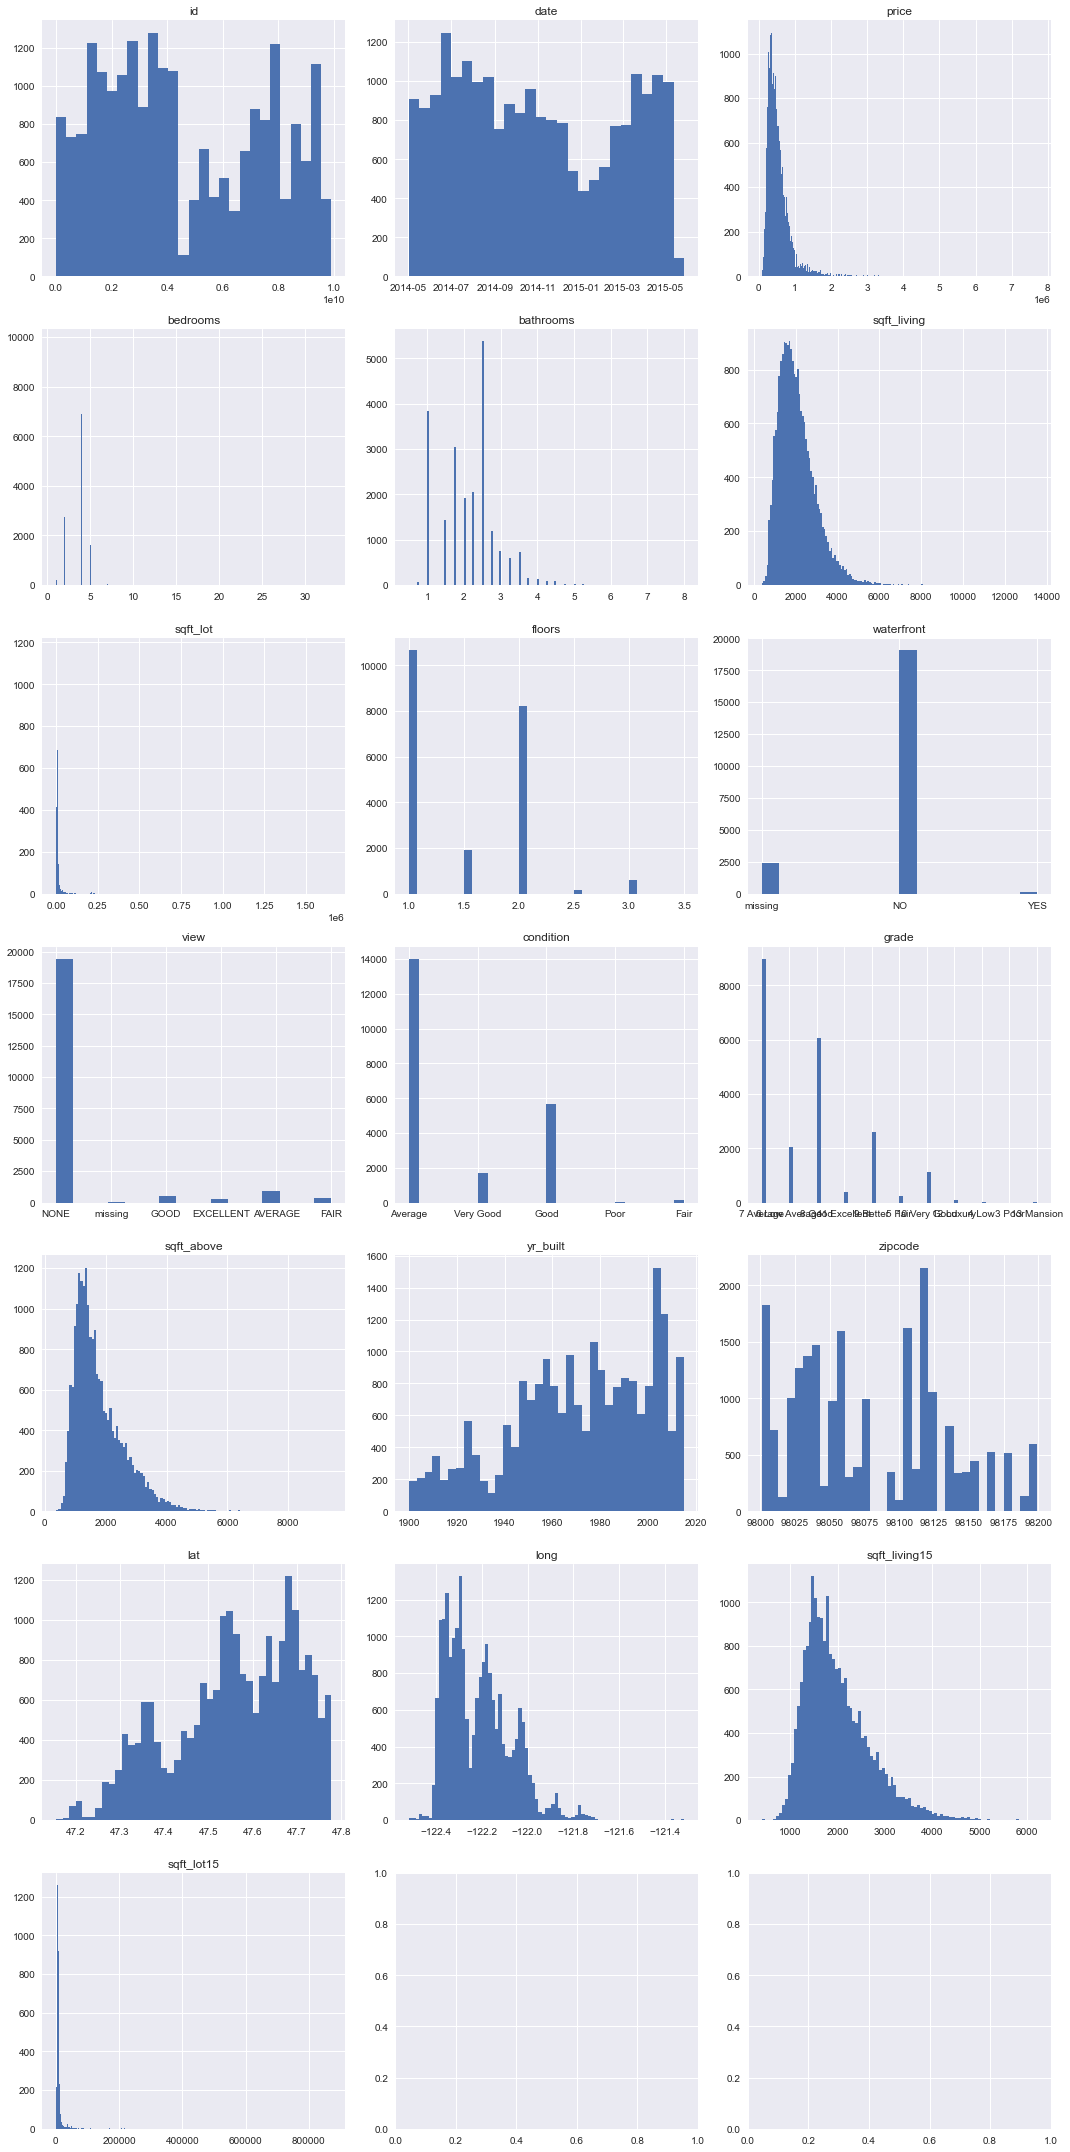

In [14]:
#Creating a histogram for each column of the dataframe:

fig, axes = plt.subplots(nrows=(7), ncols=3, figsize=(15,30))
df_cols = df.columns

for col, ax in zip(df_cols, axes.flatten()):
    ax.hist(df[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

The histograms give us a visual representation of which features have continuous values, and which do not.

### Scatterplot

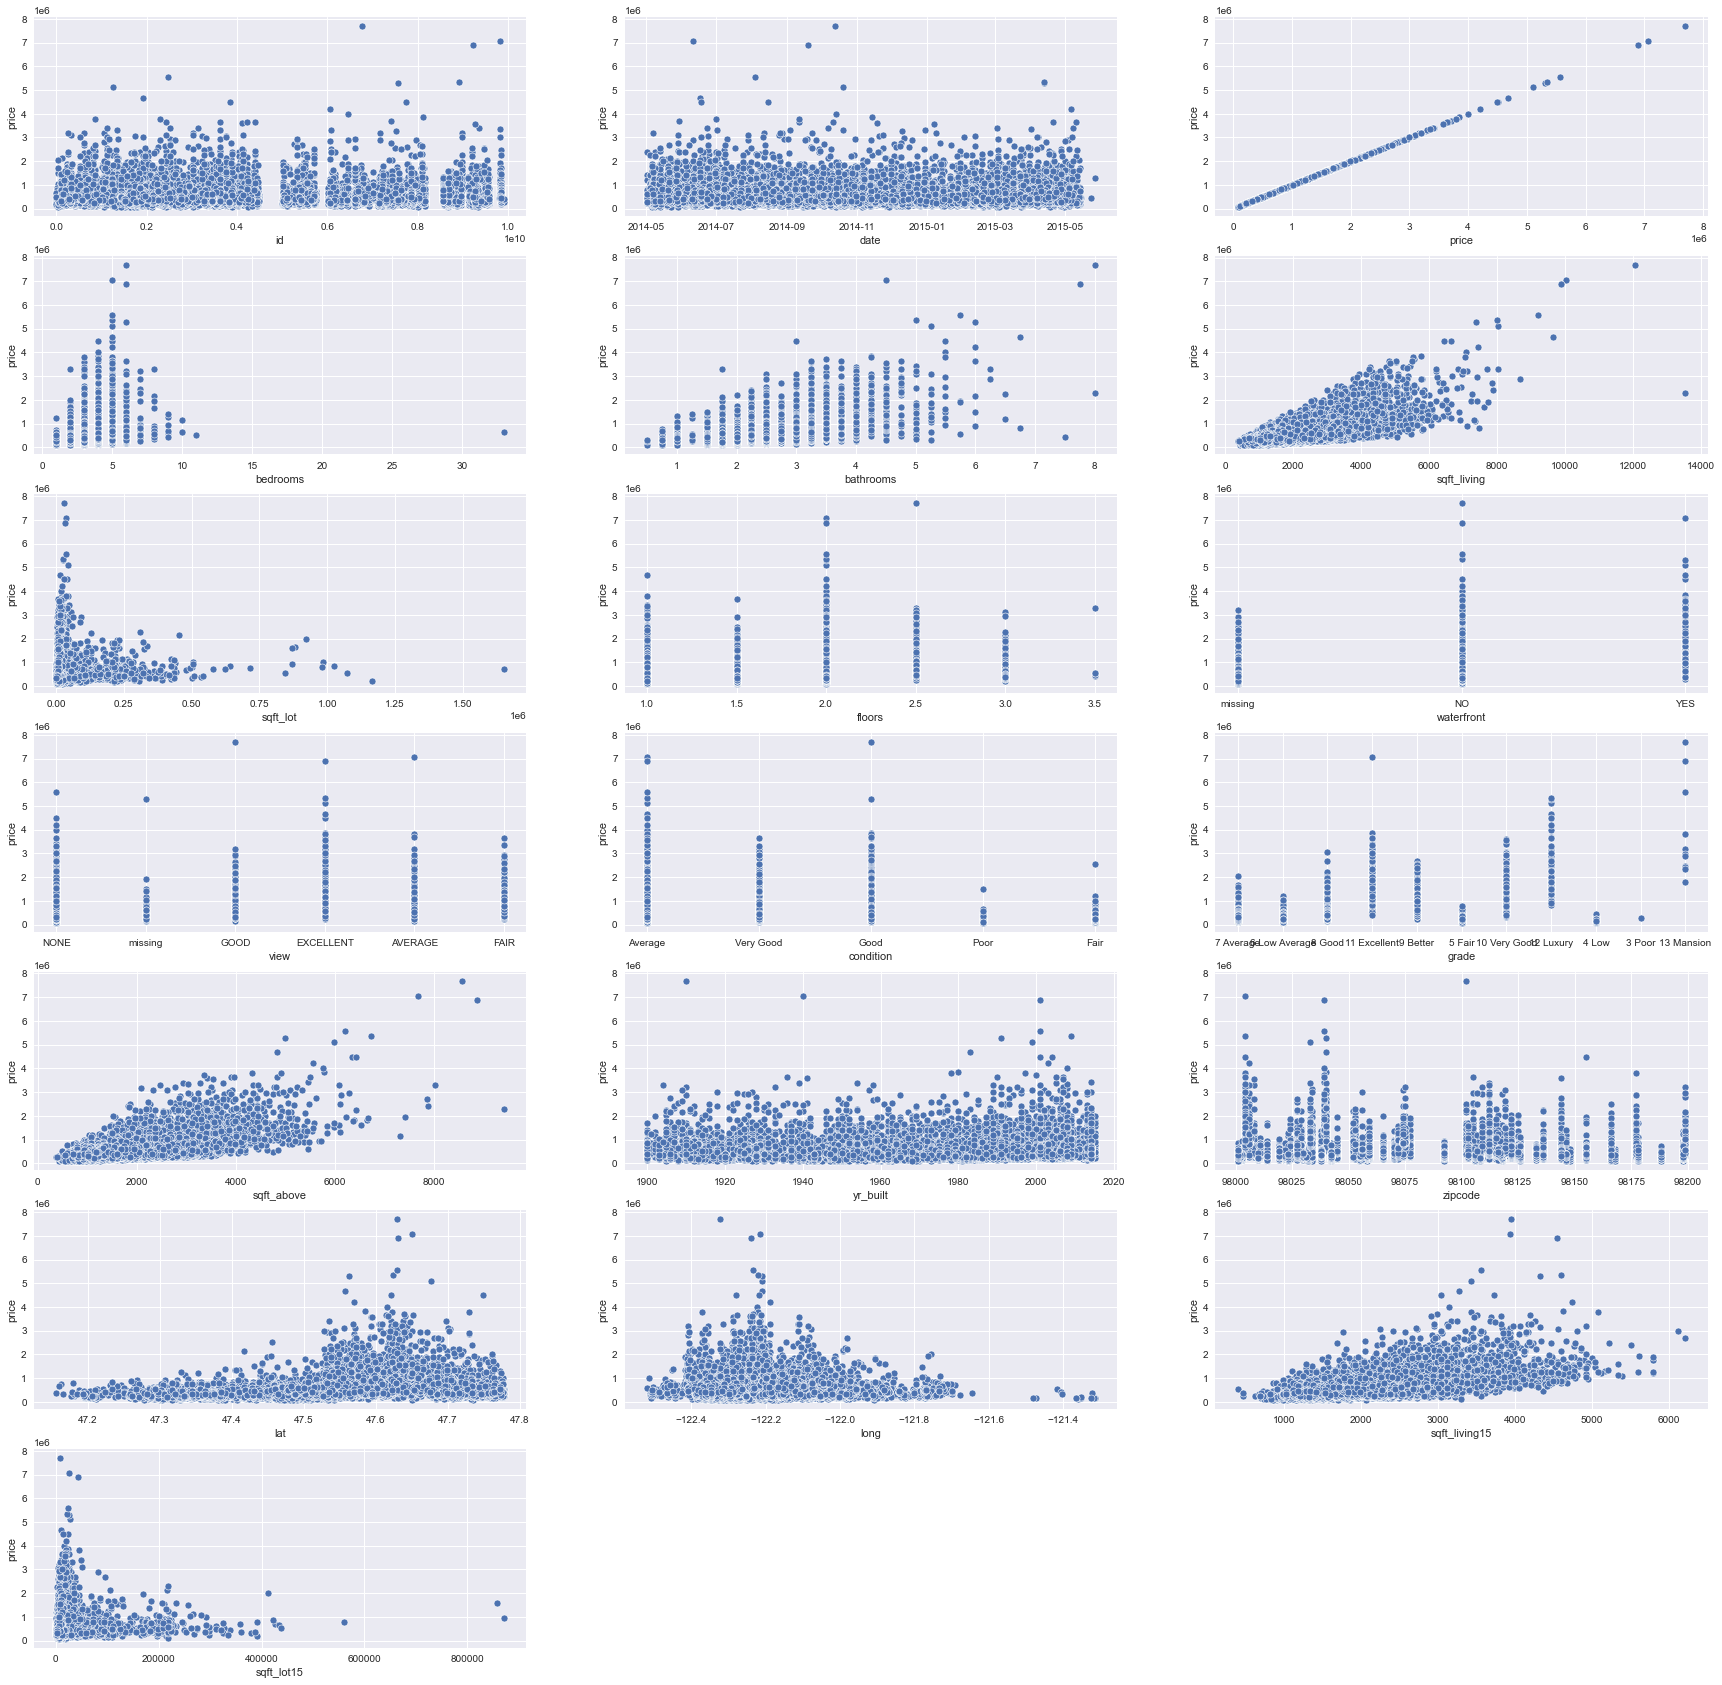

In [15]:
# Create figure, and initiate counter to iterate through the subplots:
count=1
plt.subplots(figsize=(30, 30))
fig.tight_layout()

# loop creates 21 subplots, and a Seaborn scatterplot in each, iterating through X.columns to specify the x-axis:
for i in df.columns:
    plt.subplot(7,3,count)
    sns.scatterplot(df[i],df['price'])
    count+=1

plt.show()

The scatterplots gives a visual representation of the colinearity with the target. It may also give an idea of how to group categorical variables, to reduce features.

### Ascending Bar Plots to Visualize Monotonicity in Categorical Features

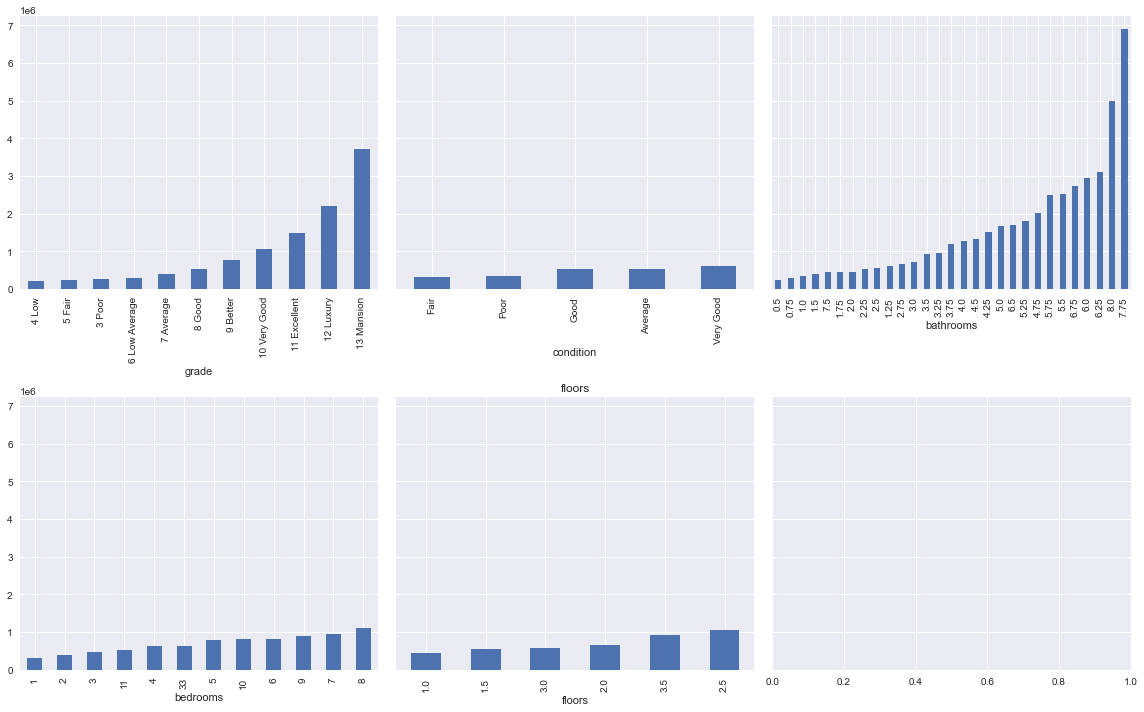

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create figure, with 6 subplots:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10), sharey=True)

# List of the 4 columns that will be grouped:
categoricals = ['grade', 'condition','bathrooms','bedrooms','floors']

# plot the mean prices of the grouped values for each of the four columns, in ascending order:
for col, ax in zip(categoricals, axes.flatten()):
    
         (df.groupby(col)        # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()          # sort the groups in ascending order
         .plot
         .bar(ax=ax))            # create a bar graph on the ax

ax.set_title(col)                # Make the title the name of the column    
fig.tight_layout()

### Data Understanding Take-aways So Far:
There appear to be eight categorical variables:<br>

        bedrooms
        bathrooms
        floors
        view
        waterfront
        condition
        grade
        zip code
        

There appear to be several potential zero inflated variables:

        sqft_lot
        sqft_lot15
        waterfront
        view

There are also several right-skewed distributions, that may be normalized by a log transformation including:

        sqft_lot
        sqft_lot15
        sqft_above


Sqft_living appears to have the strongest correlation with price. Sqft_above also appears to have a pretty strong linear relationship with price.

Since the relationship between the ordinal variables (grade,condition, bathrooms,bedrooms) are not respectively monotonic, some of the results given by the regression model may appear non-sensical.

The descriptive analysis, as well as the visualizations show that there are outliers. I will begin by removing these.

## Log Transforming , and Removing Outliers

### Log Transforming

In [17]:
# Creating a new dataframe and leaving the original as is:
df_log = df

# Creating list of right skewed features:
cont_ftrs = ['price','sqft_living','sqft_above','sqft_lot','sqft_living15','sqft_lot15']

#  Log transforming listed features:
for ftr in cont_ftrs:
    df_log['log_'+ftr] = np.log(df_log[ftr])
    
# Dropping the original,'non-transformed' columns:
df_log = df_log.drop(cont_ftrs, axis=1)
                                                      
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 21597 non-null  int64         
 1   date               21597 non-null  datetime64[ns]
 2   bedrooms           21597 non-null  int64         
 3   bathrooms          21597 non-null  float64       
 4   floors             21597 non-null  float64       
 5   waterfront         21597 non-null  object        
 6   view               21597 non-null  object        
 7   condition          21597 non-null  object        
 8   grade              21597 non-null  object        
 9   yr_built           21597 non-null  int64         
 10  zipcode            21597 non-null  int64         
 11  lat                21597 non-null  float64       
 12  long               21597 non-null  float64       
 13  log_price          21597 non-null  float64       
 14  log_sq

We still have the same 20 columns, except that six of these are now log-transformed. Below are the histograms of the log-transformed features.

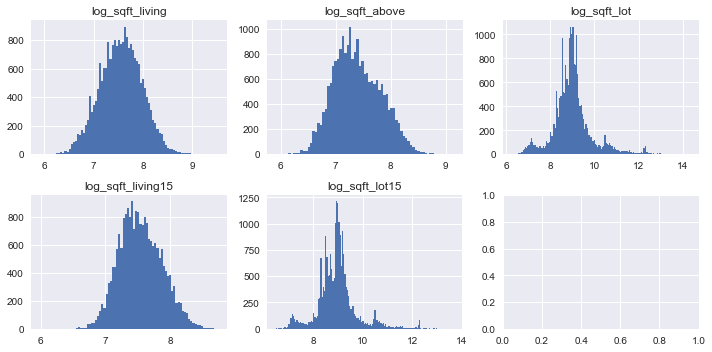

In [18]:
# Creating a dataframe with only the log-transformed features:
log_only_df = df_log.iloc[:,14:]

#Creating a histogram for each column of the dataframe:
fig, axes = plt.subplots(nrows=(2), ncols=3, figsize=(10,5))
log_only_df_cols = log_only_df.columns

for col, ax in zip(log_only_df_cols, axes.flatten()):
    ax.hist(log_only_df[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

The right-skew has been considerably reduced on the features, and the distribution of the data is more closely resembling that of a normal distribution.

### Removing Outliers 

In [19]:
# Using the Z-score to drop any 'price' values that are more than 3 standard deviations away from the mean.
# Code taken from geeksforgeeks website: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

# Z score 
z = np.abs(stats.zscore(df_log['log_price']))

In [20]:
print("Old Shape: ", df_log.shape) 

# Position of the outlier
drop_list = (np.where(z > 3))

''' Removing the Outliers '''
df_log.drop(drop_list[0], inplace = True)


print("New Shape: ", df_log.shape)

Old Shape:  (21597, 19)
New Shape:  (21428, 19)


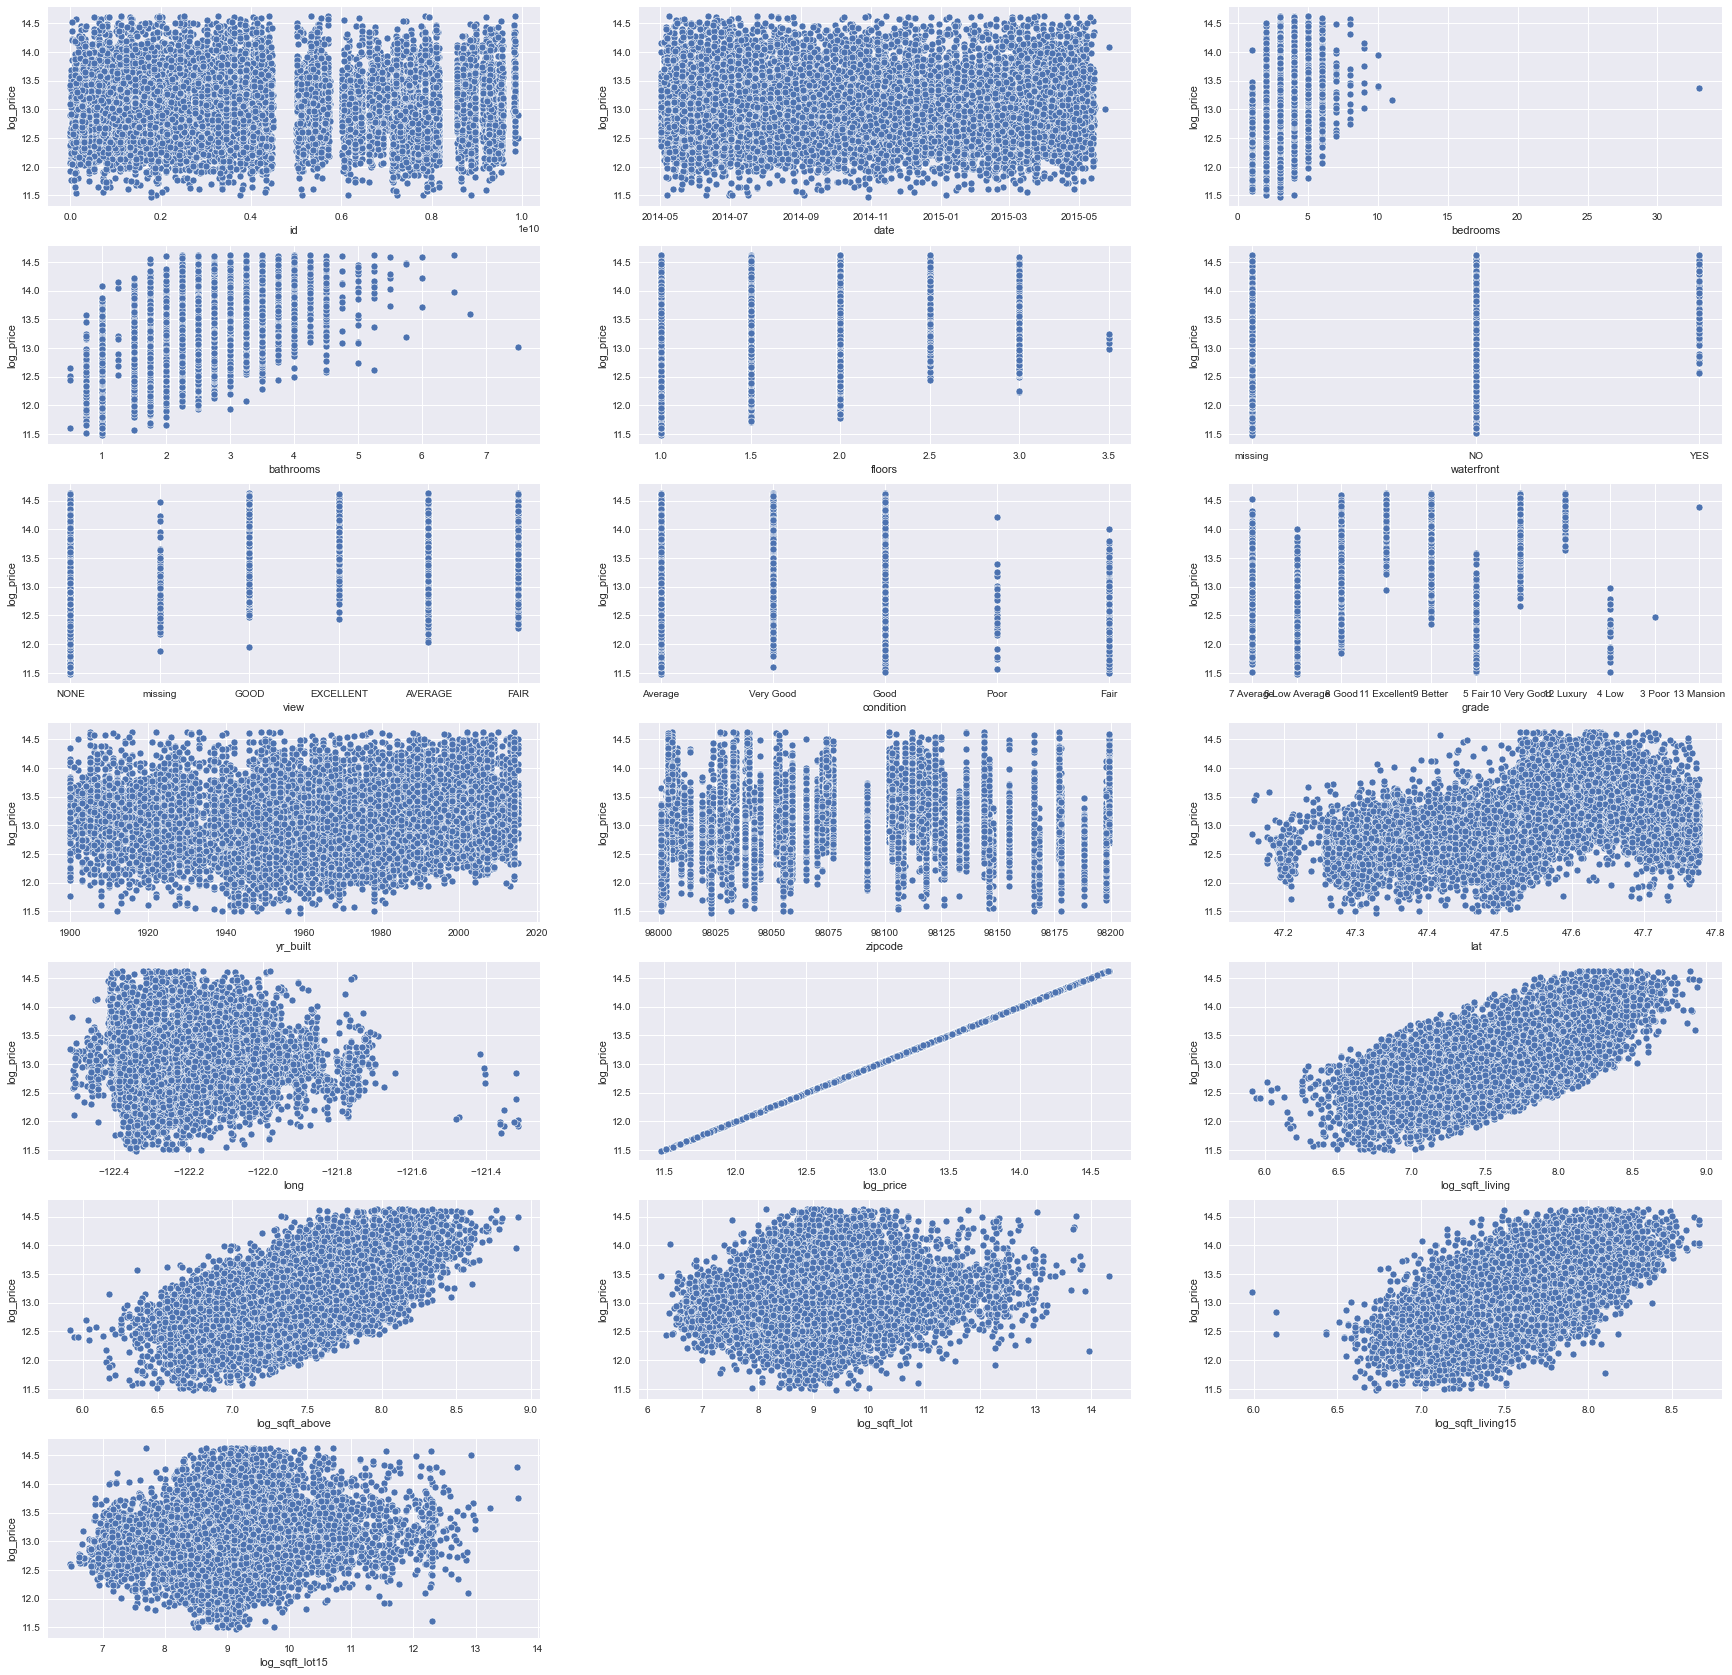

In [21]:
#Reviewing the scatter plots after the outliers are dropped

# Create figure, and initiate counter to iterate through the subplots:
count=1
plt.subplots(figsize=(30, 30))
fig.tight_layout()

# loop creates 21 subplots, and a Seaborn scatterplot in each, iterating through X.columns to specify the x-axis:
for i in df_log.columns:
    plt.subplot(7,3,count)
    sns.scatterplot(df_log[i],df_log['log_price'])
    count+=1

plt.show()

With the outliers removed, the trends can be seen much more clearly.

## Removing Additional Features and Categorical Encoding:

### Dropping Additional Features

Based on the scatterplots, I will drop the following features because they don't appear to have much correlation with the price:

          id 
          date
          yr_built
          zipcode
          long
          condition
          view
          waterfront
          grade

In [22]:
# Dropping the features:
df_log_cat = df_log.drop(['id','date','yr_built','zipcode','long','condition', 'view','waterfront','grade'],axis=1)

# Reviewing new dataframe:
df_log_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21428 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           21428 non-null  int64  
 1   bathrooms          21428 non-null  float64
 2   floors             21428 non-null  float64
 3   lat                21428 non-null  float64
 4   log_price          21428 non-null  float64
 5   log_sqft_living    21428 non-null  float64
 6   log_sqft_above     21428 non-null  float64
 7   log_sqft_lot       21428 non-null  float64
 8   log_sqft_living15  21428 non-null  float64
 9   log_sqft_lot15     21428 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.8 MB


### Categorical Encoding

I will apply one-hot encoding to the following features:

    view
    condition
    grade
    bedrooms
    bathrooms
    floors
    waterfront

In [23]:
# Creating dummy variables:
bedroom_dummies = pd.get_dummies(df_log_cat['bedrooms'], prefix='bdrm_', drop_first=True)
bathroom_dummies = pd.get_dummies(df_log_cat['bathrooms'], prefix='bthrm_', drop_first=True)
floor_dummies = pd.get_dummies(df_log_cat['floors'], prefix='flr_', drop_first=True)

# Dropping the columns containing the categorical data from 'df_log_cat' dataframe:
X_data_only_cont = df_log_cat.drop(['bedrooms','bathrooms','floors'], axis=1)

# Concatenating one-hot dataframes with 'df_log_cat' dataframe:
df_log_cat = pd.concat([X_data_only_cont, bedroom_dummies,bathroom_dummies,floor_dummies], axis=1)

df_log_cat.describe()

,lat,log_price,log_sqft_living,log_sqft_above,log_sqft_lot,log_sqft_living15,log_sqft_lot15,bdrm__2,bdrm__3,bdrm__4,...,bthrm__5.75,bthrm__6.0,bthrm__6.5,bthrm__6.75,bthrm__7.5,flr__1.5,flr__2.0,flr__2.5,flr__3.0,flr__3.5
count,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,...,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000
mean,47.559784,13.037370,7.544917,7.389780,8.984753,7.535680,8.956551,0.128150,0.457579,0.317902,...,0.000140,0.000140,0.000093,0.000047,0.000047,0.088809,0.379783,0.006907,0.028374,0.000280
std,0.138877,0.503108,0.416212,0.420714,0.901749,0.323777,0.812400,0.334265,0.498209,0.465672,...,0.011832,0.011832,0.009661,0.006831,0.006831,0.284475,0.485344,0.082822,0.166043,0.016731
min,47.155900,11.477298,5.913503,5.913503,6.253829,5.988961,6.478510,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.469675,12.678885,7.258412,7.081709,8.523722,7.299797,8.536996,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.571200,13.017003,7.554859,7.352441,8.934587,7.512071,8.937087,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.678300,13.367660,7.835975,7.691657,9.266532,7.762171,9.213884,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,47.777600,14.626441,8.952864,8.911934,14.317109,8.663888,13.677627,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There are now 48 columns. There will be 47 features after we drop the target.

## Splitting the Features and the Target

In [24]:
# Separating the features form the target:
X_log_cat_no_scale = df_log_cat.drop('log_price',axis=1)
y = df_log_cat['log_price']

In [25]:
X_log_cat_no_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21428 entries, 0 to 21596
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lat                21428 non-null  float64
 1   log_sqft_living    21428 non-null  float64
 2   log_sqft_above     21428 non-null  float64
 3   log_sqft_lot       21428 non-null  float64
 4   log_sqft_living15  21428 non-null  float64
 5   log_sqft_lot15     21428 non-null  float64
 6   bdrm__2            21428 non-null  uint8  
 7   bdrm__3            21428 non-null  uint8  
 8   bdrm__4            21428 non-null  uint8  
 9   bdrm__5            21428 non-null  uint8  
 10  bdrm__6            21428 non-null  uint8  
 11  bdrm__7            21428 non-null  uint8  
 12  bdrm__8            21428 non-null  uint8  
 13  bdrm__9            21428 non-null  uint8  
 14  bdrm__10           21428 non-null  uint8  
 15  bdrm__11           21428 non-null  uint8  
 16  bdrm__33           214

## Scaling the Features

I will split the data between the continuous features and the categorical features, scale the continuos features and then put the dataframe back together again.

In [26]:
# Creating a new dataframe to scale:
X_log_cat_scaled = X_log_cat_no_scale

# Separating the dataframe into continuous and categorical data:

cat_only =  X_log_cat_scaled.iloc[:,6:]
cont_only = X_log_cat_scaled.iloc[:,0:6]


# Scaling the dataframes with continuous data:
cont_only = (cont_only - np.mean(cont_only))/ np.std(cont_only)

# Putting the dataframe back together:
X_log_cat_scaled = pd.concat([cat_only,cont_only],axis=1)
X_log_cat_scaled.head()

,bdrm__2,bdrm__3,bdrm__4,bdrm__5,bdrm__6,bdrm__7,bdrm__8,bdrm__9,bdrm__10,bdrm__11,...,flr__2.0,flr__2.5,flr__3.0,flr__3.5,lat,log_sqft_living,log_sqft_above,log_sqft_lot,log_sqft_living15,log_sqft_lot15
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.349846,-1.133218,-0.752334,-0.382979,-1.035475,-0.390383
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1.160879,0.737008,0.695744,-0.107683,-0.318733,-0.019115
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.282572,-2.158872,-1.767010,0.250172,1.151153,0.047226
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,-0.280718,0.085974,-1.029783,-0.518516,-0.989717,-0.540827
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.410557,-0.284401,0.087399,0.013745,-0.123970,-0.041228


The data has been completely processed.

# Correlation Matrix and A Baseline Model

I will create a correlation matrix to review the features' correlation to the target and to each other.

In [27]:
pd.set_option('max_columns', None)

# Creating correlation matrix:
X_log_cat_scaled_corr_matrix = pd.concat([y,X_log_cat_scaled],axis=1)
X_log_cat_scaled_corr_matrix.corr()

,log_price,bdrm__2,bdrm__3,bdrm__4,bdrm__5,bdrm__6,bdrm__7,bdrm__8,bdrm__9,bdrm__10,bdrm__11,bdrm__33,bthrm__0.75,bthrm__1.0,bthrm__1.25,bthrm__1.5,bthrm__1.75,bthrm__2.0,bthrm__2.25,bthrm__2.5,bthrm__2.75,bthrm__3.0,bthrm__3.25,bthrm__3.5,bthrm__3.75,bthrm__4.0,bthrm__4.25,bthrm__4.5,bthrm__4.75,bthrm__5.0,bthrm__5.25,bthrm__5.5,bthrm__5.75,bthrm__6.0,bthrm__6.5,bthrm__6.75,bthrm__7.5,flr__1.5,flr__2.0,flr__2.5,flr__3.0,flr__3.5,lat,log_sqft_living,log_sqft_above,log_sqft_lot,log_sqft_living15,log_sqft_lot15
log_price,1.000000,-0.176860,-0.187972,0.229455,0.170037,0.068163,0.025350,0.023704,0.019504,0.012763,0.001687,0.004506,-0.058381,-0.340078,0.005900,-0.112771,-0.076183,-0.057623,0.026834,0.103991,0.127959,0.106214,0.181740,0.214133,0.131108,0.114376,0.100075,0.103869,0.041887,0.040185,0.039342,0.034428,0.023781,0.026604,0.024277,0.007536,-0.000277,0.043284,0.278329,0.086088,0.041802,0.003489,0.458949,0.657333,0.566757,0.124275,0.594749,0.110247
bdrm__2,-0.176860,1.000000,-0.352130,-0.261735,-0.107244,-0.042737,-0.015057,-0.009075,-0.006416,-0.004537,-0.002619,-0.002619,0.042283,0.384068,0.012583,0.060587,-0.034968,-0.015279,-0.068412,-0.158051,-0.080497,-0.062798,-0.056121,-0.070558,-0.031864,-0.028892,-0.020984,-0.025038,-0.008689,-0.010480,-0.008284,-0.005857,-0.004537,-0.004537,-0.003704,-0.002619,-0.002619,-0.030856,-0.157036,-0.025230,0.037910,0.010273,0.081091,-0.441347,-0.388497,-0.175342,-0.303088,-0.170501
bdrm__3,-0.187972,-0.352130,1.000000,-0.627029,-0.256920,-0.102384,-0.036072,-0.021741,-0.015371,-0.010868,-0.006275,-0.006275,-0.025749,0.005627,-0.000540,0.062679,0.127604,0.053948,0.046146,-0.021289,-0.109375,-0.074417,-0.046497,-0.097969,-0.057043,-0.055463,-0.041688,-0.054220,-0.020815,-0.025107,-0.019846,-0.014032,-0.010868,-0.010868,-0.008874,-0.006275,-0.006275,-0.028244,-0.118850,-0.013258,0.071532,0.007024,-0.054930,-0.221444,-0.173735,-0.038122,-0.174452,-0.024042
bdrm__4,0.229455,-0.261735,-0.627029,1.000000,-0.190966,-0.076101,-0.026812,-0.016160,-0.011425,-0.008078,-0.004664,-0.004664,-0.035264,-0.233533,-0.013994,-0.082073,-0.071637,-0.030999,0.019859,0.182247,0.115188,0.047342,0.037770,0.087528,0.033108,0.014088,0.014057,0.000109,0.006650,-0.000317,0.003810,0.009255,0.000392,-0.008078,-0.006596,-0.004664,-0.004664,0.031719,0.216595,0.007201,-0.079845,-0.011425,-0.021242,0.403464,0.366262,0.125254,0.313835,0.115852
bdrm__5,0.170037,-0.107244,-0.256920,-0.190966,1.000000,-0.031182,-0.010986,-0.006621,-0.004681,-0.003310,-0.001911,-0.001911,-0.015899,-0.110331,-0.005734,-0.040789,-0.044871,-0.018887,-0.019798,-0.043709,0.100054,0.104165,0.093184,0.116002,0.063926,0.082149,0.063806,0.070253,0.025427,0.025282,0.010614,0.007504,0.011894,0.027098,0.015918,-0.001911,-0.001911,0.029027,0.055389,0.022285,-0.034801,-0.004681,0.025924,0.270883,0.189746,0.068391,0.172054,0.058793
bdrm__6,0.068163,-0.042737,-0.102384,-0.076101,-0.031182,1.000000,-0.004378,-0.002639,-0.001866,-0.001319,-0.000762,-0.000762,-0.006336,-0.045375,-0.002285,-0.019835,-0.025968,0.000462,-0.014555,-0.036041,0.030550,0.083043,0.013400,0.019326,0.057490,0.053820,0.040502,0.136114,0.016186,0.074537,0.056466,-0.001703,-0.001319,-0.001319,0.042797,-0.000762,-0.000762,0.008408,0.013202,0.046999,-0.008838,-0.001866,0.015434,0.124177,0.083534,0.030358,0.041740,0.014164
bdrm__7,0.025350,-0.015057,-0.036072,-0.026812,-0.010986,-0.004378,1.000000,-0.000930,-0.000657,-0.000465,-0.000268,-0.000268,-0.002232,-0.015219,-0.000805,-0.001069,-0.015990,-0.012356,-0.000599,-0.017200,0.006129,0.005553,0.000965,0.025781,0.025572,0.076452,0.019660,0.034038,0.051650,-0.001074,-0.000849,0.077319,0.100124,-0.000465,-0.000379,0.173948,-0.000268,0.017024,0.010954,-0.003275,-0.006711,-0.000657,0.012871,0.053888,0.045643,0.009306,0.012371,0.000139
bdrm__8,0.023704,-0.009075,-0.021741,-0.016160,-0.006621,-0.002639,-0.000930,1.000000,-0.000396,-0.000280,-0.000162,-0.000162,-0.001345,-0.011045,-0.000485,-0.006365,-0.009638,-0.007447,-0.007687,-0.009125,0.020176,0.01

## Baseline Model
'sqft_living' is the feature most highly correlated with 'price'. I will create a baseline model with it by itself.

In [28]:
# Creating baseline dataframe without a constant:
baseline  = X_log_cat_scaled['log_sqft_living']

# Adding the constant column to the dataframe:
baseline_df = sm.add_constant(baseline)

# Fitting the data and creating the model:
baseline_model = sm.OLS(y, baseline_df).fit()

# Summary:
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                 1.630e+04
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:15   Log-Likelihood:                -9622.7
No. Observations:               21428   AIC:                         1.925e+04
Df Residuals:                   21426   BIC:                         1.927e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.0374      0.003   5033.482      0.000      13.032      13.042
log_sqft_living     0.3307      0.003    127.678      0.000       0.326       0.336
==============================================================================
Omnibus:                      191.528   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.358
Skew:                           0.071   Prob(JB):                     1.10e-29
Kurtosis:                       2.640   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This summary shows that "sqft_living" alone explains almost 43% of the variance in price.

### Ftr_set_ 2

Using all the Features

In [29]:
# Creating a dataframe without a constant:
ftr_set_2  = X_log_cat_scaled

# Adding the constant column to the dataframe:
ftr_set_2_df = sm.add_constant(ftr_set_2)

# Fitting the data and creating the model:
ftr_set_2_model = sm.OLS(y, ftr_set_2_df).fit()

# Summary:
ftr_set_2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     943.5
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:15   Log-Likelihood:                -3652.2
No. Observations:               21428   AIC:                             7400.
Df Residuals:                   21380   BIC:                             7783.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.7923      0.145     88.319      0.000      12.508      13.076
bdrm__2              -0.0378      0.022     -1.706      0.088      -0.081       0.006
bdrm__3              -0.1544      0.022     -6.961      0.000      -0.198      -0.111
bdrm__4              -0.1936      0.023     -8.498      0.000      -0.238      -0.149
bdrm__5              -0.2399      0.024    -10.010      0.000      -0.287      -0.193
bdrm__6              -0.2893      0.029     -9.892      0.000      -0.347      -0.232
bdrm__7              -0.4098      0.057     -7.253      0.000      -0.521      -0.299
bdrm__8              -0.2600      0.088     -2.969      0.003      -0.432      -0.088
bdrm__9              -0.2883      0.132     -2.191      0.028      -0.546      -0.030
bdrm__10             -0.2544      0.170     -1.493      0.135      -0.588       0.080
bdrm__11             -0.2532      0.288     -0.878      0.380      -0.819       0.312
bdrm__33              0.2264      0.288      0.785      0.432      -0.338       0.791
bthrm__0.75           0.4036      0.148      2.731      0.006       0.114       0.693
bthrm__1.0            0.3714      0.144      2.582      0.010       0.089       0.653
bthrm__1.25           0.5422      0.173      3.139      0.002       0.204       0.881
bthrm__1.5            0.3548      0.144      2.464      0.014       0.073       0.637
bthrm__1.75           0.3719      0.144      2.584      0.010       0.090       0.654
bthrm__2.0            0.3812      0.144      2.648      0.008       0.099       0.663
bthrm__2.25           0.3698      0.144      2.568      0.010       0.088       0.652
bthrm__2.5            0.3398      0.144      2.361      0.018       0.058       0.622
bthrm__2.75           0.4108      0.144      2.850      0.004       0.128       0.693
bthrm__3.0            0.4274      0.144      2.962      0.003       0.145       0.710
bthrm__3.25           0.5297      0.144      3.666      0.000       0.247       0.813
bthrm__3.5            0.5216      0.144      3.612      0.000       0.239       0.805
bthrm__3.75           0.6365      0.146      4.360      0.000       0.350       0.923
bthrm__4.0            0.5752      0.146      3.927      0.000       0.288       0.862
bthrm__4.25           0.6529      0.149      4.395      0.000       0.362       0.944
bthrm__4.5            0.5801      0.147      3.937      0.000       0.291       0.869
bthrm__4.75           0.5480      0.168      3.256      0.001       0.218       0.878
bthrm__5.0            0.6437      0.161      3.992      0.000       0.328       0.960
bthrm__5.25           0.7283      0.171      4.252      0.000       0.393       1.064
bthrm__5.5            0.7656      0.194      3.956      0.000       0.386       1.145
bthrm__5.75           0.4343      0.221      1.967      0.049       0.002

With 46 additional features, the R squared metric only increased about 24 points.

## Manually Removing Features with High P-values

### Ftr_set_ 3

Removing features with p-values over .5

In [30]:
# Creating a dataframe without a constant:
ftr_set_3  = ftr_set_2.drop(['bthrm__7.5', 'log_sqft_above'], axis=1)

# Adding the constant column to the dataframe:
ftr_set_3_df = sm.add_constant(ftr_set_3)

# Fitting the data and creating the model:
ftr_set_3_model = sm.OLS(y, ftr_set_3_df).fit()

# Summary:
ftr_set_3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     985.6
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:15   Log-Likelihood:                -3652.3
No. Observations:               21428   AIC:                             7397.
Df Residuals:                   21382   BIC:                             7763.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.8015      0.132     97.008      0.000      12.543      13.060
bdrm__2              -0.0375      0.022     -1.695      0.090      -0.081       0.006
bdrm__3              -0.1540      0.022     -6.953      0.000      -0.197      -0.111
bdrm__4              -0.1932      0.023     -8.493      0.000      -0.238      -0.149
bdrm__5              -0.2396      0.024    -10.004      0.000      -0.287      -0.193
bdrm__6              -0.2890      0.029     -9.886      0.000      -0.346      -0.232
bdrm__7              -0.4092      0.056     -7.246      0.000      -0.520      -0.299
bdrm__8              -0.2599      0.088     -2.967      0.003      -0.432      -0.088
bdrm__9              -0.2795      0.122     -2.286      0.022      -0.519      -0.040
bdrm__10             -0.2544      0.170     -1.493      0.135      -0.588       0.079
bdrm__11             -0.2527      0.288     -0.876      0.381      -0.818       0.313
bdrm__33              0.2264      0.288      0.786      0.432      -0.338       0.791
bthrm__0.75           0.3934      0.135      2.908      0.004       0.128       0.659
bthrm__1.0            0.3615      0.131      2.763      0.006       0.105       0.618
bthrm__1.25           0.5317      0.162      3.281      0.001       0.214       0.849
bthrm__1.5            0.3447      0.131      2.631      0.009       0.088       0.601
bthrm__1.75           0.3616      0.131      2.763      0.006       0.105       0.618
bthrm__2.0            0.3711      0.131      2.833      0.005       0.114       0.628
bthrm__2.25           0.3594      0.131      2.744      0.006       0.103       0.616
bthrm__2.5            0.3296      0.131      2.518      0.012       0.073       0.586
bthrm__2.75           0.4005      0.131      3.055      0.002       0.144       0.658
bthrm__3.0            0.4171      0.131      3.178      0.001       0.160       0.674
bthrm__3.25           0.5194      0.131      3.950      0.000       0.262       0.777
bthrm__3.5            0.5113      0.131      3.891      0.000       0.254       0.769
bthrm__3.75           0.6265      0.133      4.706      0.000       0.366       0.887
bthrm__4.0            0.5649      0.133      4.233      0.000       0.303       0.826
bthrm__4.25           0.6427      0.136      4.728      0.000       0.376       0.909
bthrm__4.5            0.5699      0.134      4.250      0.000       0.307       0.833
bthrm__4.75           0.5381      0.157      3.422      0.001       0.230       0.846
bthrm__5.0            0.6338      0.150      4.236      0.000       0.341       0.927
bthrm__5.25           0.7184      0.160      4.478      0.000       0.404       1.033
bthrm__5.5            0.7560      0.184      4.110      0.000       0.396       1.117
bthrm__5.75           0.4245      0.212      1.999      0.046       0.008

Interestingly enough, after removing two features, the R-sqaured and adjusted R-squared scores remained the same. The
JB score is virtually identical as well.

### Ftr_set_ 4

Removing features with p-values over .2

In [31]:
# Creating a dataframe without a constant:
ftr_set_4  = ftr_set_3.drop(['bdrm__11', 'bdrm__33', 'bthrm__6.75', 'flr__3.5'], axis=1)

# Adding the constant column to the dataframe:
ftr_set_4_df = sm.add_constant(ftr_set_4)

# Fitting the data and creating the model:
ftr_set_4_model = sm.OLS(y, ftr_set_4_df).fit()

# Summary:
ftr_set_4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1082.
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:15   Log-Likelihood:                -3654.4
No. Observations:               21428   AIC:                             7393.
Df Residuals:                   21386   BIC:                             7728.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.8640      0.121    106.566      0.000      12.627      13.101
bdrm__2              -0.0371      0.022     -1.684      0.092      -0.080       0.006
bdrm__3              -0.1536      0.022     -6.976      0.000      -0.197      -0.110
bdrm__4              -0.1929      0.023     -8.530      0.000      -0.237      -0.149
bdrm__5              -0.2393      0.024    -10.048      0.000      -0.286      -0.193
bdrm__6              -0.2887      0.029     -9.915      0.000      -0.346      -0.232
bdrm__7              -0.3992      0.056     -7.158      0.000      -0.509      -0.290
bdrm__8              -0.2597      0.088     -2.966      0.003      -0.431      -0.088
bdrm__9              -0.2898      0.122     -2.377      0.017      -0.529      -0.051
bdrm__10             -0.2542      0.170     -1.492      0.136      -0.588       0.080
bthrm__0.75           0.3309      0.124      2.659      0.008       0.087       0.575
bthrm__1.0            0.2987      0.120      2.500      0.012       0.064       0.533
bthrm__1.25           0.4690      0.153      3.065      0.002       0.169       0.769
bthrm__1.5            0.2819      0.120      2.357      0.018       0.047       0.516
bthrm__1.75           0.2989      0.120      2.501      0.012       0.065       0.533
bthrm__2.0            0.3083      0.120      2.578      0.010       0.074       0.543
bthrm__2.25           0.2967      0.120      2.482      0.013       0.062       0.531
bthrm__2.5            0.2669      0.119      2.235      0.025       0.033       0.501
bthrm__2.75           0.3378      0.120      2.823      0.005       0.103       0.572
bthrm__3.0            0.3543      0.120      2.958      0.003       0.120       0.589
bthrm__3.25           0.4566      0.120      3.804      0.000       0.221       0.692
bthrm__3.5            0.4485      0.120      3.740      0.000       0.213       0.684
bthrm__3.75           0.5636      0.122      4.628      0.000       0.325       0.802
bthrm__4.0            0.5019      0.122      4.112      0.000       0.263       0.741
bthrm__4.25           0.5798      0.125      4.646      0.000       0.335       0.824
bthrm__4.5            0.5072      0.123      4.128      0.000       0.266       0.748
bthrm__4.75           0.4744      0.147      3.217      0.001       0.185       0.763
bthrm__5.0            0.5711      0.140      4.090      0.000       0.297       0.845
bthrm__5.25           0.6557      0.151      4.338      0.000       0.359       0.952
bthrm__5.5            0.6913      0.175      3.943      0.000       0.348       1.035
bthrm__5.75           0.3585      0.205      1.751      0.080      -0.043       0.760
bthrm__6.0            0.7001      0.207      3.390      0.001       0.295       1.105
bthrm__6.5            0.8699      0.236      3.686      0.000       0.407

Once again , all the scores are virtually unchanged, after removing another 4 features.

### Ftr_set_ 5

Removing features with p-values over .05

In [32]:
# Creating a dataframe without a constant:
ftr_set_5  = ftr_set_4.drop(['bdrm__2', 'bdrm__10', 'bthrm__5.75'], axis=1)

# Adding the constant column to the dataframe:
ftr_set_5_df = sm.add_constant(ftr_set_5)

# Fitting the data and creating the model:
ftr_set_5_model = sm.OLS(y, ftr_set_5_df).fit()

# Summary:
ftr_set_5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1167.
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:15   Log-Likelihood:                -3658.2
No. Observations:               21428   AIC:                             7394.
Df Residuals:                   21389   BIC:                             7705.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.9528      0.098    132.689      0.000      12.761      13.144
bdrm__3              -0.1179      0.007    -17.357      0.000      -0.131      -0.105
bdrm__4              -0.1569      0.008    -19.395      0.000      -0.173      -0.141
bdrm__5              -0.2029      0.011    -18.699      0.000      -0.224      -0.182
bdrm__6              -0.2522      0.020    -12.677      0.000      -0.291      -0.213
bdrm__7              -0.3595      0.052     -6.974      0.000      -0.461      -0.258
bdrm__8              -0.2231      0.085     -2.627      0.009      -0.390      -0.057
bdrm__9              -0.2742      0.120     -2.293      0.022      -0.509      -0.040
bthrm__0.75           0.2175      0.104      2.095      0.036       0.014       0.421
bthrm__1.0            0.1742      0.098      1.781      0.075      -0.017       0.366
bthrm__1.25           0.3517      0.137      2.572      0.010       0.084       0.620
bthrm__1.5            0.1570      0.098      1.605      0.109      -0.035       0.349
bthrm__1.75           0.1740      0.098      1.782      0.075      -0.017       0.365
bthrm__2.0            0.1833      0.098      1.876      0.061      -0.008       0.375
bthrm__2.25           0.1719      0.098      1.760      0.078      -0.020       0.363
bthrm__2.5            0.1422      0.098      1.458      0.145      -0.049       0.333
bthrm__2.75           0.2132      0.098      2.180      0.029       0.022       0.405
bthrm__3.0            0.2295      0.098      2.343      0.019       0.038       0.422
bthrm__3.25           0.3321      0.098      3.382      0.001       0.140       0.525
bthrm__3.5            0.3240      0.098      3.306      0.001       0.132       0.516
bthrm__3.75           0.4391      0.100      4.381      0.000       0.243       0.636
bthrm__4.0            0.3774      0.101      3.752      0.000       0.180       0.575
bthrm__4.25           0.4554      0.104      4.385      0.000       0.252       0.659
bthrm__4.5            0.3832      0.102      3.768      0.000       0.184       0.582
bthrm__4.75           0.3499      0.130      2.688      0.007       0.095       0.605
bthrm__5.0            0.4469      0.121      3.682      0.000       0.209       0.685
bthrm__5.25           0.5096      0.133      3.821      0.000       0.248       0.771
bthrm__5.5            0.5667      0.161      3.522      0.000       0.251       0.882
bthrm__6.0            0.5760      0.195      2.960      0.003       0.195       0.957
bthrm__6.5            0.7462      0.226      3.308      0.001       0.304       1.188
flr__1.5              0.1273      0.007     17.330      0.000       0.113       0.142
flr__2.0              0.0186      0.006      3.270      0.001       0.007       0.030
flr__2.5              0.2102      0.024      8.669      0.000       0.163

After removing three more features, the R-squared and Adjusted R-squared are the same, but the JB score has gone up about two points.Upon removing those three features with p-values <= .05, another several features with elevated p-values appeared. I will remove these as well.  

### Ftr_set_ 6

Removing features with p-values over .05

In [33]:
# Creating a dataframe without a constant:
ftr_set_6  = ftr_set_5.drop(['bthrm__1.0', 'bthrm__1.5', 'bthrm__1.75', 'bthrm__2.0', 'bthrm__2.25','bthrm__2.5'],
                              axis=1)

# Adding the constant column to the dataframe:
ftr_set_6_df = sm.add_constant(ftr_set_6)

# Fitting the data and creating the model:
ftr_set_6_model = sm.OLS(y, ftr_set_6_df).fit()

# Summary:
ftr_set_6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1382.
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:15   Log-Likelihood:                -3675.9
No. Observations:               21428   AIC:                             7418.
Df Residuals:                   21395   BIC:                             7681.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.1205      0.007   1928.542      0.000      13.107      13.134
bdrm__3              -0.1183      0.007    -17.795      0.000      -0.131      -0.105
bdrm__4              -0.1585      0.008    -19.835      0.000      -0.174      -0.143
bdrm__5              -0.2036      0.011    -18.841      0.000      -0.225      -0.182
bdrm__6              -0.2527      0.020    -12.714      0.000      -0.292      -0.214
bdrm__7              -0.3720      0.051     -7.260      0.000      -0.472      -0.272
bdrm__8              -0.2281      0.085     -2.685      0.007      -0.395      -0.062
bdrm__9              -0.2994      0.119     -2.526      0.012      -0.532      -0.067
bthrm__0.75           0.0420      0.035      1.200      0.230      -0.027       0.111
bthrm__1.25           0.1880      0.096      1.960      0.050   -3.68e-05       0.376
bthrm__2.75           0.0556      0.009      6.188      0.000       0.038       0.073
bthrm__3.0            0.0730      0.011      6.558      0.000       0.051       0.095
bthrm__3.25           0.1802      0.013     14.099      0.000       0.155       0.205
bthrm__3.5            0.1740      0.012     14.943      0.000       0.151       0.197
bthrm__3.75           0.2888      0.024     11.889      0.000       0.241       0.336
bthrm__4.0            0.2284      0.027      8.508      0.000       0.176       0.281
bthrm__4.25           0.3085      0.036      8.453      0.000       0.237       0.380
bthrm__4.5            0.2358      0.031      7.571      0.000       0.175       0.297
bthrm__4.75           0.2017      0.087      2.315      0.021       0.031       0.372
bthrm__5.0            0.2989      0.073      4.120      0.000       0.157       0.441
bthrm__5.25           0.3622      0.091      3.969      0.000       0.183       0.541
bthrm__5.5            0.4227      0.129      3.271      0.001       0.169       0.676
bthrm__6.0            0.4329      0.169      2.567      0.010       0.102       0.763
bthrm__6.5            0.6015      0.204      2.952      0.003       0.202       1.001
flr__1.5              0.1281      0.007     17.578      0.000       0.114       0.142
flr__2.0              0.0068      0.005      1.335      0.182      -0.003       0.017
flr__2.5              0.2036      0.024      8.412      0.000       0.156       0.251
flr__3.0              0.0850      0.013      6.580      0.000       0.060       0.110
lat                   0.2047      0.002    100.511      0.000       0.201       0.209
log_sqft_living       0.2462      0.004     63.957      0.000       0.239       0.254
log_sqft_lot          0.0138      0.005      2.703      0.007       0.004       0.024
log_sqft_living15     0.1237      0.003     40.032      0.000       0.118       0.130
log_sqft_lot15       -0.0341      0.005     -6.755      0.000      -0.044

After removing an additonal 6 features, the Adjusted R-squared score went down .001 points, and the JB score went up about 4 points. There are a few more features with elevated p-values that appeared.

### Ftr_set_ 7

Removing features with p-values over .05

In [34]:
# Creating a dataframe without a constant:
ftr_set_7  = ftr_set_6.drop(['bthrm__0.75', 'bthrm__1.25', 'flr__2.0'], axis=1)

# Adding the constant column to the dataframe:
ftr_set_7_df = sm.add_constant(ftr_set_7)

# Fitting the data and creating the model:
ftr_set_7_model = sm.OLS(y, ftr_set_7_df).fit()

# Summary:
ftr_set_7_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1525.
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:15   Log-Likelihood:                -3679.5
No. Observations:               21428   AIC:                             7419.
Df Residuals:                   21398   BIC:                             7658.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.1244      0.006   2061.869      0.000      13.112      13.137
bdrm__3              -0.1193      0.007    -17.974      0.000      -0.132      -0.106
bdrm__4              -0.1593      0.008    -19.947      0.000      -0.175      -0.144
bdrm__5              -0.2053      0.011    -19.067      0.000      -0.226      -0.184
bdrm__6              -0.2546      0.020    -12.828      0.000      -0.293      -0.216
bdrm__7              -0.3737      0.051     -7.294      0.000      -0.474      -0.273
bdrm__8              -0.2305      0.085     -2.714      0.007      -0.397      -0.064
bdrm__9              -0.2999      0.119     -2.530      0.011      -0.532      -0.068
bthrm__2.75           0.0552      0.009      6.147      0.000       0.038       0.073
bthrm__3.0            0.0733      0.011      6.585      0.000       0.052       0.095
bthrm__3.25           0.1814      0.013     14.214      0.000       0.156       0.206
bthrm__3.5            0.1754      0.012     15.117      0.000       0.153       0.198
bthrm__3.75           0.2899      0.024     11.939      0.000       0.242       0.338
bthrm__4.0            0.2293      0.027      8.544      0.000       0.177       0.282
bthrm__4.25           0.3099      0.036      8.493      0.000       0.238       0.381
bthrm__4.5            0.2374      0.031      7.622      0.000       0.176       0.298
bthrm__4.75           0.2015      0.087      2.313      0.021       0.031       0.372
bthrm__5.0            0.3005      0.073      4.143      0.000       0.158       0.443
bthrm__5.25           0.3636      0.091      3.983      0.000       0.185       0.542
bthrm__5.5            0.4236      0.129      3.278      0.001       0.170       0.677
bthrm__6.0            0.4358      0.169      2.585      0.010       0.105       0.766
bthrm__6.5            0.6045      0.204      2.967      0.003       0.205       1.004
flr__1.5              0.1257      0.007     17.869      0.000       0.112       0.139
flr__2.5              0.1990      0.024      8.309      0.000       0.152       0.246
flr__3.0              0.0816      0.013      6.486      0.000       0.057       0.106
lat                   0.2044      0.002    100.927      0.000       0.200       0.208
log_sqft_living       0.2471      0.004     66.806      0.000       0.240       0.254
log_sqft_lot          0.0129      0.005      2.541      0.011       0.003       0.023
log_sqft_living15     0.1244      0.003     40.656      0.000       0.118       0.130
log_sqft_lot15       -0.0341      0.005     -6.768      0.000      -0.044      -0.024
==============================================================================
Omnibus:                      256.584   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.725
Skew:   

After removing another three features, the R-squared scores are virtually identical, and the JB score went up about five points. Given that all the p-values are well below .05, I will review the four assumptions of linear regression. 

# Review Assumptions of Linear Regression: The Process 
 I will:
 
   1. Build a new dataframe, with the current features, as well as the target, predicted (values), residuals, and           their coresponding z-scores. I may have to create different iterations of this dataframe in order to reflect the       changes in the model. This dataframe will help make the necessary changes to the model, if necessary. 
   2. Review the four assumptions of linear regression, and see what can be done to meet them, if the data doesn't
       currently do so.
   3. In this section I will go through different iterations of the model if necessary. Given that making one                change to the model, can impact different aspects of the model, modifying the model to meet one assumption, may        change the model in such a way that it no longer meets an assumption that was previously met. To that end, in          this section I will go through the process of meeting the four assumptions, and in the following sections, I          will formally show how the final model satisfies the four assumptions.


### Building a Reference Dataframe

Building a reference df with all the model features, the target, constant, model predictions, model residuals, model prediction z-scores, model residuals z-scores, and target z-scores.

In [35]:
full_feature_set = ff_set (ftr_set_7, y, ftr_set_7_model) 
full_feature_set.head()

,log_price,const,bdrm__3,bdrm__4,bdrm__5,bdrm__6,bdrm__7,bdrm__8,bdrm__9,bthrm__2.75,bthrm__3.0,bthrm__3.25,bthrm__3.5,bthrm__3.75,bthrm__4.0,bthrm__4.25,bthrm__4.5,bthrm__4.75,bthrm__5.0,bthrm__5.25,bthrm__5.5,bthrm__6.0,bthrm__6.5,flr__1.5,flr__2.5,flr__3.0,lat,log_sqft_living,log_sqft_lot,log_sqft_living15,log_sqft_lot15,preds,resids,z_score_resids,z_score_price,z_score_preds
0,12.309982,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.349846,-1.133218,-0.382979,-1.035475,-0.390383,12.533070,-0.223088,0.776478,1.445790,1.221055
1,13.195614,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.160879,0.737008,-0.107683,-0.318733,-0.019115,13.384112,-0.188499,0.656086,0.314532,0.839563
2,12.100712,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.282572,-2.158872,0.250172,1.151153,0.047226,12.997891,-0.897178,3.122709,1.861744,0.095591
3,13.311329,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.280718,0.085974,-0.518516,-0.989717,-0.540827,12.890902,0.420428,1.463337,0.544534,0.354643
4,13.142166,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.410557,-0.284401,0.013745,-0.123970,-0.041228,13.004880,0.137286,0.477837,0.208297,0.078668


## Assumption of linear independence 

In order to satisfy this assumption, I will check to see if there are any correlations >= .75, and check the vif scores for the continuous features.

In [36]:
extra_cols = ['z_score_price','z_score_resids','z_score_preds','log_price', 'resids','preds','const']

# Creating a dataframe to use with Pandas correlation matrix:
corr_ftrs = full_feature_set.drop( extra_cols, axis=1)
corr_ftrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21428 entries, 0 to 21596
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bdrm__3            21428 non-null  uint8  
 1   bdrm__4            21428 non-null  uint8  
 2   bdrm__5            21428 non-null  uint8  
 3   bdrm__6            21428 non-null  uint8  
 4   bdrm__7            21428 non-null  uint8  
 5   bdrm__8            21428 non-null  uint8  
 6   bdrm__9            21428 non-null  uint8  
 7   bthrm__2.75        21428 non-null  uint8  
 8   bthrm__3.0         21428 non-null  uint8  
 9   bthrm__3.25        21428 non-null  uint8  
 10  bthrm__3.5         21428 non-null  uint8  
 11  bthrm__3.75        21428 non-null  uint8  
 12  bthrm__4.0         21428 non-null  uint8  
 13  bthrm__4.25        21428 non-null  uint8  
 14  bthrm__4.5         21428 non-null  uint8  
 15  bthrm__4.75        21428 non-null  uint8  
 16  bthrm__5.0         214

In [37]:
abs(corr_ftrs.corr()) > 0.75

,bdrm__3,bdrm__4,bdrm__5,bdrm__6,bdrm__7,bdrm__8,bdrm__9,bthrm__2.75,bthrm__3.0,bthrm__3.25,bthrm__3.5,bthrm__3.75,bthrm__4.0,bthrm__4.25,bthrm__4.5,bthrm__4.75,bthrm__5.0,bthrm__5.25,bthrm__5.5,bthrm__6.0,bthrm__6.5,flr__1.5,flr__2.5,flr__3.0,lat,log_sqft_living,log_sqft_lot,log_sqft_living15,log_sqft_lot15
bdrm__3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bdrm__4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bdrm__5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bdrm__6,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bdrm__7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bdrm__8,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bdrm__9,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bthrm__2.75,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bthrm__3.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bthrm__3.25,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


By visually inspecting the matrix, I see that all the features have a correlation above .75 across the diagonal, as expected. I will check to see if there are any more 'high' correlation beyond those.

In [38]:
(abs(corr_ftrs.corr()) > 0.75).sum()

bdrm__3              1
bdrm__4              1
bdrm__5              1
bdrm__6              1
bdrm__7              1
bdrm__8              1
bdrm__9              1
bthrm__2.75          1
bthrm__3.0           1
bthrm__3.25          1
bthrm__3.5           1
bthrm__3.75          1
bthrm__4.0           1
bthrm__4.25          1
bthrm__4.5           1
bthrm__4.75          1
bthrm__5.0           1
bthrm__5.25          1
bthrm__5.5           1
bthrm__6.0           1
bthrm__6.5           1
flr__1.5             1
flr__2.5             1
flr__3.0             1
lat                  1
log_sqft_living      1
log_sqft_lot         2
log_sqft_living15    1
log_sqft_lot15       2
dtype: int64

From the list above, I can see that 'log_sqft_lot', and 'log_sqft_lot15' have 'high' correlations, with features other than themselves. I will check the variance inflation factor (VIF) for all the continuous variables, and check to see if any are above 5.

In [39]:
# Creating dataframe of only continuous features:
corr_ftrs_cont = full_feature_set[['lat','log_sqft_living','log_sqft_lot','log_sqft_living15','log_sqft_lot15']]

# Display info():
corr_ftrs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21428 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lat                21428 non-null  float64
 1   log_sqft_living    21428 non-null  float64
 2   log_sqft_lot       21428 non-null  float64
 3   log_sqft_living15  21428 non-null  float64
 4   log_sqft_lot15     21428 non-null  float64
dtypes: float64(5)
memory usage: 1004.4 KB


In [40]:
# Using V.I.F to identify the features that are most highly correlated with all the other features:
vif = [variance_inflation_factor(corr_ftrs_cont.values, i) for i in range(corr_ftrs_cont.shape[1])]
pd.Series(vif, index=corr_ftrs_cont.columns, name="Variance Inflation Factor")

lat                  1.035371
log_sqft_living      2.255342
log_sqft_lot         6.546219
log_sqft_living15    2.357393
log_sqft_lot15       6.549722
Name: Variance Inflation Factor, dtype: float64

I see that both 'log_sqft_lot', and 'log_sqft_lot15' both have values above 5. Since 'log_sqft_lot15' is slightly higher, I will create a new model with that feature removed.

### Ftr_set_ 8

Removing log_sqft_lot15 since it has a high VIF score.

In [41]:
# Creating a dataframe without a constant:
ftr_set_8  = ftr_set_7.drop(['log_sqft_lot15'], axis=1)

# Adding the constant column to the dataframe:
ftr_set_8_df = sm.add_constant(ftr_set_8)

# Fitting the data and creating the model:
ftr_set_8_model = sm.OLS(y, ftr_set_8_df).fit()

# Summary:
ftr_set_8_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1574.
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:15   Log-Likelihood:                -3702.4
No. Observations:               21428   AIC:                             7463.
Df Residuals:                   21399   BIC:                             7694.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.1249      0.006   2059.924      0.000      13.112      13.137
bdrm__3              -0.1206      0.007    -18.155      0.000      -0.134      -0.108
bdrm__4              -0.1599      0.008    -20.010      0.000      -0.176      -0.144
bdrm__5              -0.2058      0.011    -19.093      0.000      -0.227      -0.185
bdrm__6              -0.2523      0.020    -12.700      0.000      -0.291      -0.213
bdrm__7              -0.3687      0.051     -7.191      0.000      -0.469      -0.268
bdrm__8              -0.2245      0.085     -2.640      0.008      -0.391      -0.058
bdrm__9              -0.2911      0.119     -2.453      0.014      -0.524      -0.059
bthrm__2.75           0.0551      0.009      6.124      0.000       0.037       0.073
bthrm__3.0            0.0745      0.011      6.685      0.000       0.053       0.096
bthrm__3.25           0.1821      0.013     14.258      0.000       0.157       0.207
bthrm__3.5            0.1760      0.012     15.151      0.000       0.153       0.199
bthrm__3.75           0.2905      0.024     11.950      0.000       0.243       0.338
bthrm__4.0            0.2286      0.027      8.509      0.000       0.176       0.281
bthrm__4.25           0.3092      0.037      8.465      0.000       0.238       0.381
bthrm__4.5            0.2374      0.031      7.617      0.000       0.176       0.299
bthrm__4.75           0.1940      0.087      2.225      0.026       0.023       0.365
bthrm__5.0            0.2913      0.073      4.012      0.000       0.149       0.434
bthrm__5.25           0.3663      0.091      4.009      0.000       0.187       0.545
bthrm__5.5            0.4228      0.129      3.269      0.001       0.169       0.676
bthrm__6.0            0.4214      0.169      2.496      0.013       0.091       0.752
bthrm__6.5            0.6053      0.204      2.968      0.003       0.206       1.005
flr__1.5              0.1275      0.007     18.112      0.000       0.114       0.141
flr__2.5              0.2002      0.024      8.351      0.000       0.153       0.247
flr__3.0              0.0842      0.013      6.687      0.000       0.060       0.109
lat                   0.2046      0.002    100.950      0.000       0.201       0.209
log_sqft_living       0.2488      0.004     67.341      0.000       0.242       0.256
log_sqft_lot         -0.0178      0.002     -7.945      0.000      -0.022      -0.013
log_sqft_living15     0.1217      0.003     40.069      0.000       0.116       0.128
==============================================================================
Omnibus:                      253.614   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.482
Skew:                           0.183   Prob(JB):                     3.46e-71
Kurtosis:      

Both the R-squared and adjusted R-sqaured scores are identical at 67.3, and the JB score went up about 2 points , and is at 324.482. I will check How the removal of log_sqft_lot15 will affected the VIF scores, and the correlation index.

In [42]:
# Using V.I.F to identify the features that are most highly correlated with all the other features.

# Creating new continuous features dataframe with 'log_sqft_lot15' dropped:
corr_ftrs_cont_II = corr_ftrs_cont.drop(['log_sqft_lot15'], axis=1)

# Creating a Pandas Series with the VIF for each continuous feature:
vif = [variance_inflation_factor(corr_ftrs_cont_II.values, i) for i in range(corr_ftrs_cont_II.shape[1])]
pd.Series(vif, index=corr_ftrs_cont_II.columns, name="Variance Inflation Factor")

lat                  1.034663
log_sqft_living      2.235552
log_sqft_lot         1.194528
log_sqft_living15    2.309046
Name: Variance Inflation Factor, dtype: float64

In [43]:
# Creating new 'corr_ftrs' dataframe with 'log_sqft_lot15' dropped:
corr_ftrs_II = corr_ftrs.drop(['log_sqft_lot15'], axis=1)

# Corr_ftrs_II correlation list:
(abs(corr_ftrs_II.corr()) > 0.75).sum()

bdrm__3              1
bdrm__4              1
bdrm__5              1
bdrm__6              1
bdrm__7              1
bdrm__8              1
bdrm__9              1
bthrm__2.75          1
bthrm__3.0           1
bthrm__3.25          1
bthrm__3.5           1
bthrm__3.75          1
bthrm__4.0           1
bthrm__4.25          1
bthrm__4.5           1
bthrm__4.75          1
bthrm__5.0           1
bthrm__5.25          1
bthrm__5.5           1
bthrm__6.0           1
bthrm__6.5           1
flr__1.5             1
flr__2.5             1
flr__3.0             1
lat                  1
log_sqft_living      1
log_sqft_lot         1
log_sqft_living15    1
dtype: int64

After dropping 'log_sqft_lot15', all the VIF scores are well below 5, and the correlation sums are all equal to 1. This satisfies the assumption of linear independence.

## Assumption of Variable linearity:

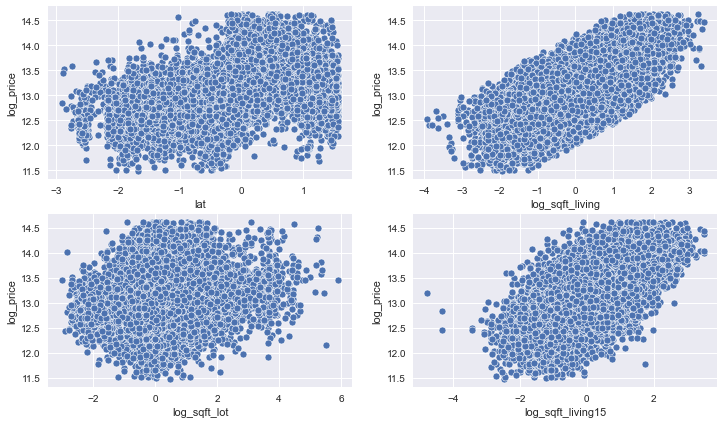

In [44]:
# creating extended feature set that includes target:
ftr_set_8_ext = pd.concat([ftr_set_8,y], axis=1)

#Reviewing the scatter plots after the outliers are dropped
ftr_set_8_to_plot = ftr_set_8_ext.iloc[:,24:28]

count=1
plt.subplots(figsize=(12, 7))
for i in ftr_set_8_to_plot.columns:
    plt.subplot(2,2,count)
    sns.scatterplot(ftr_set_8_to_plot[i],ftr_set_8_ext["log_price"])
    count+=1

plt.show()

From the scatter plots we can see the linear relationships between each continuous feature and the target. As for the nominal features, we can tell that they have a linear relationship with the target, through the coefficients they were assigned, and the fact that their p-values are well below .05.

## Full Feature Set 2

Creating a new dataframe to reflect the changes in rows and columns:

In [45]:
# Creating new 'full_feature_set' dataframe with 'log_sqft_lot15' dropped:
full_feature_set_II = full_feature_set.drop(['log_sqft_lot15'], axis=1)

# Display correlation matrix (pearson):
full_feature_set_II.corr()

,log_price,const,bdrm__3,bdrm__4,bdrm__5,bdrm__6,bdrm__7,bdrm__8,bdrm__9,bthrm__2.75,bthrm__3.0,bthrm__3.25,bthrm__3.5,bthrm__3.75,bthrm__4.0,bthrm__4.25,bthrm__4.5,bthrm__4.75,bthrm__5.0,bthrm__5.25,bthrm__5.5,bthrm__6.0,bthrm__6.5,flr__1.5,flr__2.5,flr__3.0,lat,log_sqft_living,log_sqft_lot,log_sqft_living15,preds,resids,z_score_resids,z_score_price,z_score_preds
log_price,1.000000,NaN,-1.879715e-01,2.294547e-01,1.700368e-01,6.816343e-02,2.534961e-02,2.370352e-02,1.950407e-02,1.279590e-01,1.062145e-01,1.817404e-01,2.141332e-01,1.311075e-01,1.143759e-01,1.000750e-01,1.038693e-01,4.188669e-02,4.018532e-02,3.934222e-02,3.442819e-02,2.660424e-02,2.427656e-02,4.328414e-02,8.608835e-02,4.180161e-02,4.589491e-01,6.573327e-01,1.242753e-01,5.947494e-01,8.209042e-01,5.710660e-01,0.149499,0.113586,0.045912
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bdrm__3,-0.187972,NaN,1.000000e+00,-6.270292e-01,-2.569201e-01,-1.023843e-01,-3.607161e-02,-2.174133e-02,-1.537129e-02,-1.093748e-01,-7.441747e-02,-4.649737e-02,-9.796943e-02,-5.704294e-02,-5.546326e-02,-4.168755e-02,-5.421972e-02,-2.081525e-02,-2.510707e-02,-1.984610e-02,-1.403168e-02,-1.086838e-02,-8.873790e-03,-2.824440e-02,-1.325781e-02,7.153171e-02,-5.493041e-02,-2.214443e-01,-3.812157e-02,-1.744522e-01,-2.289811e-01,9.601894e-14,-0.040454,-0.074026,-0.079140
bdrm__4,0.229455,NaN,-6.270292e-01,1.000000e+00,-1.909662e-01,-7.610125e-02,-2.681167e-02,-1.616012e-02,-1.142533e-02,1.151881e-01,4.734207e-02,3.777026e-02,8.752814e-02,3.310820e-02,1.408850e-02,1.405735e-02,1.093213e-04,6.650228e-03,-3.171033e-04,3.809554e-03,9.254974e-03,-8.078361e-03,-6.595800e-03,3.171876e-02,7.200608e-03,-7.984472e-02,-2.124157e-02,4.034644e-01,1.252540e-01,3.138350e-01,2.795146e-01,-7.604002e-14,-0.026006,0.033523,0.019228
bdrm__5,0.170037,NaN,-2.569201e-01,-1.909662e-01,1.000000e+00,-3.118187e-02,-1.098587e-02,-6.621478e-03,-4.681436e-03,1.000538e-01,1.041654e-01,9.318449e-02,1.160016e-01,6.392605e-02,8.214871e-02,6.380582e-02,7.025335e-02,2.542704e-02,2.528152e-02,1.061382e-02,7.504228e-03,2.709836e-02,1.591826e-02,2.902692e-02,2.228481e-02,-3.480096e-02,2.592438e-02,2.708833e-01,6.839055e-02,1.720538e-01,2.071335e-01,3.845768e-15,0.046414,0.072301,0.080838
bdrm__6,0.068163,NaN,-1.023843e-01,-7.610125e-02,-3.118187e-02,1.000000e+00,-4.377938e-03,-2.638701e-03,-1.865582e-03,3.054999e-02,8.304297e-02,1.339967e-02,1.932578e-02,5.749022e-02,5.382009e-02,4.050185e-02,1.361138e-01,1.618564e-02,7.453749e-02,5.646571e-02,-1.702996e-03,-1.319073e-03,4.279719e-02,8.408277e-03,4.699873e-02,-8.838487e-03,1.543394e-02,1.241766e-01,3.035765e-02,4.173980e-02,8.303458e-02,1.280133e-14,0.024756,0.031092,0.030301
bdrm__7,0.025350,NaN,-3.607161e-02,-2.681167e-02,-1.098587e-02,-4.377938e-03,1.000000e+00,-9.296560e-04,-6.572740e-04,6.128725e-03,5.553019e-03,9.646894e-04,2.578125e-02,2.557249e-02,7.645214e-02,1.965952e-02,3.403773e-02,5.165028e-02,-1.073575e-03,-8.486163e-04,7.731901e-02,-4.647304e-04,-3.794419e-04,1.702447e-02,-3.275261e-03,-6.711387e-03,1.287098e-02,5.388812e-02,9.306136e-03,1.237148e-02,3.088011e-02,-2.587482e-14,0.003120,0.004411,0.010008
bdrm__8,0.023704,NaN,-2.174133e-02,-1.616012e-02,-6.621478e-03,-2.638701e-03,-9.296560e-04,1.000000e+00,-3.961568e-04,2.017650e-02,1.706062e-02,8.416004e-03,6.564529e-03,2.193095e-02,2.454115e-02,-1.295598e-03,-1.545879e-03,-5.364614e-04,7.156889e-02,-5.114839e-04,-3.616315e-04,1.664449e-01,-2.286999e-04,-4.556464e-04,-1.974088e-03,-4.045134e-03,1.202234e-02,3.318078e-02,-2.333527e-03,3.319649e-03,2.887489e-02,2.524702e-14,0.018282,0.015457,0.016574
bdrm__9,0.019504,NaN,-1.537129e-02,-1.142533e-02,-4.681436e-03,-1.865582e-03,-6.572740e-04,-3.961568e-04,1.000000e+00,-4.047374e-03,2.729803e-02,-2.754111e-03,-3.113900e-03,-1.390940e-03,3.596274e-02,-9.159976e-04,8.469349e-02,-3.792824e-04,-4.574851e-04,-3.616231e-04,-2.556763e-04,-1.980368e-04,-1.616926e-04,-5.224798e-03,6.59

The correlation matrix shows all the model features have a linear correlation with the target. In addition to this, these set of features 'explain' over 67% of the variance, and they all have p-values well under .05. This should satisfy the assumption of variable linearity.

## Assumption of Homoscedasticity

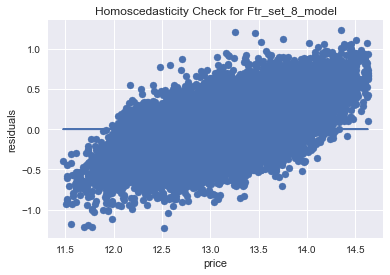

In [46]:
plt.scatter(y, ftr_set_8_model.resid)
plt.plot(y, [0 for i in range (len(ftr_set_8))]);
plt.xlabel("price")
plt.ylabel("residuals")
plt.title('Homoscedasticity Check for Ftr_set_8_model');

From the scatterplot we can see that the variance of the residuals is pretty consistent for most of the data, with the exception of the ends. I will create a new dataset with the price between 12 and 14.5

In [47]:
# Creating feature set 9 'extended' which includes the the target:
ftr_set_9_ext = pd.concat([ftr_set_8, y], axis=1)

# Creating a sub-dataframe with the 'log_price' greater than 12 , and less than 14.5
ftr_set_9_ext = ftr_set_9_ext.loc[(ftr_set_9_ext['log_price'] > 12) & (ftr_set_9_ext['log_price'] < 14.5)]

# Splitting data set so I can create a new model:
ftr_set_9 = ftr_set_9_ext.drop(['log_price'], axis=1)

# Creating 'y' for feature_set_9:
y_ftr_9 = ftr_set_9_ext['log_price']

ftr_set_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21095 entries, 0 to 21596
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bdrm__3            21095 non-null  uint8  
 1   bdrm__4            21095 non-null  uint8  
 2   bdrm__5            21095 non-null  uint8  
 3   bdrm__6            21095 non-null  uint8  
 4   bdrm__7            21095 non-null  uint8  
 5   bdrm__8            21095 non-null  uint8  
 6   bdrm__9            21095 non-null  uint8  
 7   bthrm__2.75        21095 non-null  uint8  
 8   bthrm__3.0         21095 non-null  uint8  
 9   bthrm__3.25        21095 non-null  uint8  
 10  bthrm__3.5         21095 non-null  uint8  
 11  bthrm__3.75        21095 non-null  uint8  
 12  bthrm__4.0         21095 non-null  uint8  
 13  bthrm__4.25        21095 non-null  uint8  
 14  bthrm__4.5         21095 non-null  uint8  
 15  bthrm__4.75        21095 non-null  uint8  
 16  bthrm__5.0         210

The numbers of rows has decreased by 333 from 21,428 to 21,095. I will create another scatterplot to see if the homoscedasticity has improved. I will first create the model to get the residuals.

### Ftr_set_ 9

New model with 333 rows dropped.

In [48]:
# Adding the constant column to the dataframe:
ftr_set_9_df = sm.add_constant(ftr_set_9)

# Fitting the data and creating the model:
ftr_set_9_model = sm.OLS(y_ftr_9, ftr_set_9_df).fit()

# Summary:
ftr_set_9_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1475.
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:16   Log-Likelihood:                -3047.4
No. Observations:               21095   AIC:                             6153.
Df Residuals:                   21066   BIC:                             6384.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.1326      0.006   2093.294      0.000      13.120      13.145
bdrm__3              -0.1276      0.007    -19.476      0.000      -0.140      -0.115
bdrm__4              -0.1599      0.008    -20.382      0.000      -0.175      -0.145
bdrm__5              -0.2029      0.011    -19.217      0.000      -0.224      -0.182
bdrm__6              -0.2466      0.019    -12.682      0.000      -0.285      -0.209
bdrm__7              -0.3515      0.050     -7.043      0.000      -0.449      -0.254
bdrm__8              -0.2677      0.085     -3.144      0.002      -0.435      -0.101
bdrm__9              -0.2653      0.115     -2.300      0.021      -0.491      -0.039
bthrm__2.75           0.0573      0.009      6.544      0.000       0.040       0.074
bthrm__3.0            0.0714      0.011      6.549      0.000       0.050       0.093
bthrm__3.25           0.1831      0.013     14.621      0.000       0.159       0.208
bthrm__3.5            0.1842      0.011     16.239      0.000       0.162       0.206
bthrm__3.75           0.2849      0.024     11.814      0.000       0.238       0.332
bthrm__4.0            0.2227      0.027      8.357      0.000       0.170       0.275
bthrm__4.25           0.2972      0.037      8.046      0.000       0.225       0.370
bthrm__4.5            0.2385      0.031      7.745      0.000       0.178       0.299
bthrm__4.75           0.1580      0.089      1.777      0.076      -0.016       0.332
bthrm__5.0            0.3107      0.071      4.402      0.000       0.172       0.449
bthrm__5.25           0.3127      0.094      3.340      0.001       0.129       0.496
bthrm__5.5            0.3627      0.141      2.578      0.010       0.087       0.638
bthrm__6.0            0.1371      0.198      0.692      0.489      -0.251       0.526
bthrm__6.5            0.2402      0.280      0.856      0.392      -0.310       0.790
flr__1.5              0.1274      0.007     18.501      0.000       0.114       0.141
flr__2.5              0.1921      0.024      8.082      0.000       0.146       0.239
flr__3.0              0.0812      0.012      6.622      0.000       0.057       0.105
lat                   0.2000      0.002    100.623      0.000       0.196       0.204
log_sqft_living       0.2337      0.004     64.149      0.000       0.227       0.241
log_sqft_lot         -0.0150      0.002     -6.841      0.000      -0.019      -0.011
log_sqft_living15     0.1207      0.003     40.497      0.000       0.115       0.127
==============================================================================
Omnibus:                      322.842   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              371.039
Skew:                           0.256   Prob(JB):                     2.69e-81
Kurtosis:      

Removing the rows caused the R-squared scores to go down about 1 point, and the JB score to increase about 45 points. It also caused some features to have elevated p-values. I will create a new model with those rows dropped, and then re-check for homscedasticity.

### Ftr_set_ 10

Removing features with p-values over .05

In [49]:
# Creating a dataframe without a constant:
ftr_set_10  = ftr_set_9.drop(['bthrm__4.75', 'bthrm__6.0', 'bthrm__6.5'], axis=1)

# Adding the constant column to the dataframe:
ftr_set_10_df = sm.add_constant(ftr_set_10)

# Fitting the data and creating the model:
ftr_set_10_model = sm.OLS(y_ftr_9, ftr_set_10_df).fit()

# Summary:
ftr_set_10_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1652.
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:16   Log-Likelihood:                -3049.6
No. Observations:               21095   AIC:                             6151.
Df Residuals:                   21069   BIC:                             6358.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.1331      0.006   2094.587      0.000      13.121      13.145
bdrm__3              -0.1279      0.007    -19.531      0.000      -0.141      -0.115
bdrm__4              -0.1603      0.008    -20.438      0.000      -0.176      -0.145
bdrm__5              -0.2028      0.011    -19.215      0.000      -0.224      -0.182
bdrm__6              -0.2455      0.019    -12.641      0.000      -0.284      -0.207
bdrm__7              -0.3471      0.050     -6.962      0.000      -0.445      -0.249
bdrm__8              -0.2679      0.085     -3.147      0.002      -0.435      -0.101
bdrm__9              -0.2658      0.115     -2.303      0.021      -0.492      -0.040
bthrm__2.75           0.0568      0.009      6.488      0.000       0.040       0.074
bthrm__3.0            0.0708      0.011      6.495      0.000       0.049       0.092
bthrm__3.25           0.1824      0.013     14.570      0.000       0.158       0.207
bthrm__3.5            0.1834      0.011     16.179      0.000       0.161       0.206
bthrm__3.75           0.2838      0.024     11.773      0.000       0.237       0.331
bthrm__4.0            0.2214      0.027      8.312      0.000       0.169       0.274
bthrm__4.25           0.2959      0.037      8.012      0.000       0.224       0.368
bthrm__4.5            0.2370      0.031      7.699      0.000       0.177       0.297
bthrm__5.0            0.3093      0.071      4.381      0.000       0.171       0.448
bthrm__5.25           0.3112      0.094      3.324      0.001       0.128       0.495
bthrm__5.5            0.3601      0.141      2.560      0.010       0.084       0.636
flr__1.5              0.1274      0.007     18.501      0.000       0.114       0.141
flr__2.5              0.1930      0.024      8.123      0.000       0.146       0.240
flr__3.0              0.0817      0.012      6.662      0.000       0.058       0.106
lat                   0.2000      0.002    100.635      0.000       0.196       0.204
log_sqft_living       0.2341      0.004     64.339      0.000       0.227       0.241
log_sqft_lot         -0.0150      0.002     -6.813      0.000      -0.019      -0.011
log_sqft_living15     0.1207      0.003     40.490      0.000       0.115       0.127
==============================================================================
Omnibus:                      323.574   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              371.667
Skew:                           0.257   Prob(JB):                     1.97e-81
Kurtosis:                       3.399   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After removing an additional three columns, the R-sqaured scores are both holding steady at .662, and the JB score remains the same at 371.667. I will now create a scatterplot of this dataset to re-check for homoscedasticity.

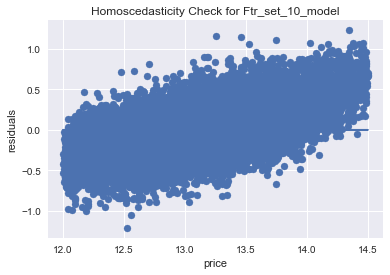

In [50]:
# Creating scatterplot to check for homoscedasticity:
plt.scatter(y_ftr_9, ftr_set_10_model.resid)
plt.plot(y_ftr_9, [0 for i in range (len(ftr_set_10))]);
plt.xlabel("price")
plt.ylabel("residuals")
plt.title('Homoscedasticity Check for Ftr_set_10_model');

The variance looks pretty consistent across the whole dataset. 

## Assumption of Residual Normality

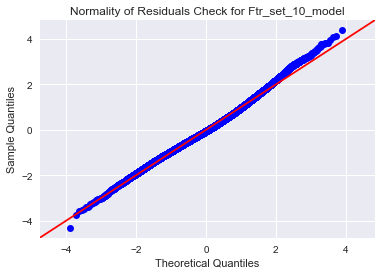

In [51]:
fig = sm.graphics.qqplot(ftr_set_10_model.resid, dist=stats.norm, line='45', fit=True)
plt.title('Normality of Residuals Check for Ftr_set_10_model');

The JB Score is almost 372. The QQ plot looks pretty good, but the distribution of the residuals has a right skew of almost .26, and a kurtosis of 3.399. The kurtosis above three indicates thicker, possibly longer tails, which in turn may be an indication of outliers. I will try to reduce these by removing residuals where the absolute value of the z-scores is greater than 3.

### Full Feature Set 3

Creating a new dataframe to reflect the changes in rows and columns:

In [52]:
full_feature_set_III = ff_set (ftr_set_10_df, y_ftr_9, ftr_set_10_model) 
full_feature_set.head()

,log_price,const,bdrm__3,bdrm__4,bdrm__5,bdrm__6,bdrm__7,bdrm__8,bdrm__9,bthrm__2.75,bthrm__3.0,bthrm__3.25,bthrm__3.5,bthrm__3.75,bthrm__4.0,bthrm__4.25,bthrm__4.5,bthrm__4.75,bthrm__5.0,bthrm__5.25,bthrm__5.5,bthrm__6.0,bthrm__6.5,flr__1.5,flr__2.5,flr__3.0,lat,log_sqft_living,log_sqft_lot,log_sqft_living15,log_sqft_lot15,preds,resids,z_score_resids,z_score_price,z_score_preds
0,12.309982,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.349846,-1.133218,-0.382979,-1.035475,-0.390383,12.533070,-0.223088,0.776478,1.445790,1.221055
1,13.195614,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.160879,0.737008,-0.107683,-0.318733,-0.019115,13.384112,-0.188499,0.656086,0.314532,0.839563
2,12.100712,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.282572,-2.158872,0.250172,1.151153,0.047226,12.997891,-0.897178,3.122709,1.861744,0.095591
3,13.311329,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.280718,0.085974,-0.518516,-0.989717,-0.540827,12.890902,0.420428,1.463337,0.544534,0.354643
4,13.142166,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.410557,-0.284401,0.013745,-0.123970,-0.041228,13.004880,0.137286,0.477837,0.208297,0.078668


In [53]:
full_feature_set_III = full_feature_set_III.loc[abs(full_feature_set_III['z_score_resids']<=3)]
len(full_feature_set_III)

20984

In [54]:
ftr_set_11 = full_feature_set_III.drop(extra_cols, axis=1)
y_ftr_11 = full_feature_set_III['log_price']

### Ftr_set_ 11

Dropped about 500 additional rows.

In [55]:
# Adding the constant column to the dataframe:
ftr_set_11_df = sm.add_constant(ftr_set_11)

# Fitting the data and creating the model:
ftr_set_11_model = sm.OLS(y_ftr_11, ftr_set_11_df).fit()

# Summary:
ftr_set_11_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1736.
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:17   Log-Likelihood:                -2463.8
No. Observations:               20984   AIC:                             4980.
Df Residuals:                   20958   BIC:                             5186.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.1292      0.006   2143.824      0.000      13.117      13.141
bdrm__3              -0.1278      0.006    -19.983      0.000      -0.140      -0.115
bdrm__4              -0.1583      0.008    -20.662      0.000      -0.173      -0.143
bdrm__5              -0.2066      0.010    -20.017      0.000      -0.227      -0.186
bdrm__6              -0.2440      0.019    -12.870      0.000      -0.281      -0.207
bdrm__7              -0.3464      0.049     -7.140      0.000      -0.442      -0.251
bdrm__8              -0.2665      0.083     -3.216      0.001      -0.429      -0.104
bdrm__9              -0.2740      0.112     -2.440      0.015      -0.494      -0.054
bthrm__2.75           0.0554      0.009      6.478      0.000       0.039       0.072
bthrm__3.0            0.0751      0.011      7.051      0.000       0.054       0.096
bthrm__3.25           0.1884      0.012     15.454      0.000       0.164       0.212
bthrm__3.5            0.1912      0.011     17.305      0.000       0.170       0.213
bthrm__3.75           0.2904      0.023     12.377      0.000       0.244       0.336
bthrm__4.0            0.2295      0.026      8.849      0.000       0.179       0.280
bthrm__4.25           0.3049      0.036      8.481      0.000       0.234       0.375
bthrm__4.5            0.2563      0.030      8.509      0.000       0.197       0.315
bthrm__5.0            0.3189      0.069      4.641      0.000       0.184       0.454
bthrm__5.25           0.3201      0.091      3.512      0.000       0.141       0.499
bthrm__5.5            0.3734      0.137      2.727      0.006       0.105       0.642
flr__1.5              0.1322      0.007     19.606      0.000       0.119       0.145
flr__2.5              0.2071      0.023      8.892      0.000       0.161       0.253
flr__3.0              0.0753      0.012      6.291      0.000       0.052       0.099
lat                   0.2013      0.002    103.803      0.000       0.197       0.205
log_sqft_living       0.2322      0.004     65.208      0.000       0.225       0.239
log_sqft_lot         -0.0164      0.002     -7.606      0.000      -0.021      -0.012
log_sqft_living15     0.1205      0.003     41.265      0.000       0.115       0.126
==============================================================================
Omnibus:                      140.457   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.418
Skew:                           0.197   Prob(JB):                     7.20e-32
Kurtosis:                       3.092   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Rechecking Residual Normality

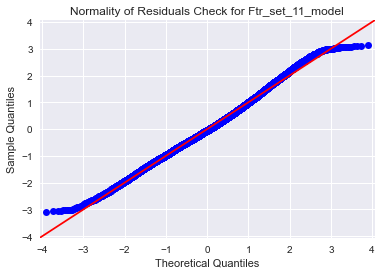

In [56]:
fig = sm.graphics.qqplot(ftr_set_11_model.resid, dist=stats.norm, line='45', fit=True)
plt.title('Normality of Residuals Check for Ftr_set_11_model');

The JB score has decreased considerably to about 143, which is less than 40% of the previous score. The skew and kurtosis have also decreased to 0.197, and 3.092 respectively. Note that the QQ plot is now displaying a plot view that is twice as detailed on both axes; so the departure from the straight line would be four times as pronounced. Also note that on then lower extreme of the data, we can see the decrease in data points. I will now check to see if the assumption of homoscedasticity is still satisfied. 

## Rechecking Homoscedasticity

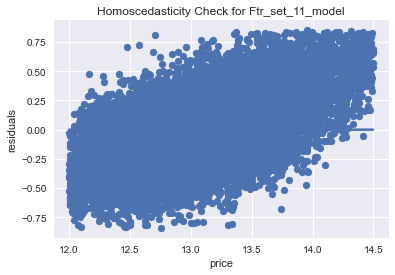

In [57]:
plt.scatter(y_ftr_11, ftr_set_11_model.resid)
plt.plot(y_ftr_11, [0 for i in range (len(ftr_set_11))]);
plt.xlabel("price")
plt.ylabel("residuals")
plt.title('Homoscedasticity Check for Ftr_set_11_model');

The variance looks pretty uniform except for the upper extreme above 14.25. I will create a new data set with only 'log_price'(s) under 14.25.

In [58]:
# Creating feature set 12 'extended' which includes the the target:
ftr_set_12_ext = pd.concat([ftr_set_11, y_ftr_11], axis=1)

# Creating a sub-dataframe with the 'log_price' less than 14.25:
ftr_set_12_ext = ftr_set_12_ext.loc[(ftr_set_12_ext['log_price'] < 14.25)]

# Splitting data set so I can create a new model:
ftr_set_12 = ftr_set_12_ext.drop(['log_price'], axis=1)

# Creating 'y' for feature_set_9:
y_ftr_12 = ftr_set_12_ext['log_price']

ftr_set_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20739 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bdrm__3            20739 non-null  uint8  
 1   bdrm__4            20739 non-null  uint8  
 2   bdrm__5            20739 non-null  uint8  
 3   bdrm__6            20739 non-null  uint8  
 4   bdrm__7            20739 non-null  uint8  
 5   bdrm__8            20739 non-null  uint8  
 6   bdrm__9            20739 non-null  uint8  
 7   bthrm__2.75        20739 non-null  uint8  
 8   bthrm__3.0         20739 non-null  uint8  
 9   bthrm__3.25        20739 non-null  uint8  
 10  bthrm__3.5         20739 non-null  uint8  
 11  bthrm__3.75        20739 non-null  uint8  
 12  bthrm__4.0         20739 non-null  uint8  
 13  bthrm__4.25        20739 non-null  uint8  
 14  bthrm__4.5         20739 non-null  uint8  
 15  bthrm__5.0         20739 non-null  uint8  
 16  bthrm__5.25        207

### Ftr_set_ 12

Dropped about 250 additional rows.

In [59]:
# Adding the constant column to the dataframe:
ftr_set_12_df = sm.add_constant(ftr_set_12)

# Fitting the data and creating the model:
ftr_set_12_model = sm.OLS(y_ftr_12, ftr_set_12_df).fit()

# Summary:
ftr_set_12_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     1615.
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:17   Log-Likelihood:                -1996.2
No. Observations:               20739   AIC:                             4044.
Df Residuals:                   20713   BIC:                             4251.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.1188      0.006   2180.643      0.000      13.107      13.131
bdrm__3              -0.1204      0.006    -19.191      0.000      -0.133      -0.108
bdrm__4              -0.1489      0.008    -19.778      0.000      -0.164      -0.134
bdrm__5              -0.1957      0.010    -19.166      0.000      -0.216      -0.176
bdrm__6              -0.2206      0.019    -11.665      0.000      -0.258      -0.184
bdrm__7              -0.3245      0.048     -6.712      0.000      -0.419      -0.230
bdrm__8              -0.3481      0.090     -3.874      0.000      -0.524      -0.172
bdrm__9              -0.2103      0.110     -1.910      0.056      -0.426       0.006
bthrm__2.75           0.0514      0.008      6.093      0.000       0.035       0.068
bthrm__3.0            0.0721      0.011      6.866      0.000       0.052       0.093
bthrm__3.25           0.1527      0.012     12.328      0.000       0.128       0.177
bthrm__3.5            0.1649      0.011     14.804      0.000       0.143       0.187
bthrm__3.75           0.2181      0.025      8.706      0.000       0.169       0.267
bthrm__4.0            0.1926      0.027      7.129      0.000       0.140       0.246
bthrm__4.25           0.2569      0.039      6.669      0.000       0.181       0.332
bthrm__4.5            0.1636      0.034      4.881      0.000       0.098       0.229
bthrm__5.0            0.2186      0.081      2.692      0.007       0.059       0.378
bthrm__5.25           0.1890      0.101      1.868      0.062      -0.009       0.387
bthrm__5.5            0.2876      0.155      1.857      0.063      -0.016       0.591
flr__1.5              0.1319      0.007     19.931      0.000       0.119       0.145
flr__2.5              0.2008      0.023      8.585      0.000       0.155       0.247
flr__3.0              0.0734      0.012      6.187      0.000       0.050       0.097
lat                   0.1994      0.002    104.855      0.000       0.196       0.203
log_sqft_living       0.2247      0.004     63.916      0.000       0.218       0.232
log_sqft_lot         -0.0180      0.002     -8.461      0.000      -0.022      -0.014
log_sqft_living15     0.1190      0.003     41.141      0.000       0.113       0.125
==============================================================================
Omnibus:                      105.187   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.864
Skew:                           0.171   Prob(JB):                     6.23e-24
Kurtosis:                       3.081   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ftr_set_ 13

Dropped 3 additional columns, with p-values above .05. There are now 22 features.

In [60]:
# Creating a dataframe without a constant:
ftr_set_13  = ftr_set_12.drop(['bthrm__5.25','bthrm__5.5','bdrm__9',], axis=1)

# Adding the constant column to the dataframe:
ftr_set_13_df = sm.add_constant(ftr_set_13)

# Fitting the data and creating the model:
ftr_set_13_model = sm.OLS(y_ftr_12, ftr_set_13_df).fit()

# Summary:
ftr_set_13_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1835.
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:17   Log-Likelihood:                -2001.5
No. Observations:               20739   AIC:                             4049.
Df Residuals:                   20716   BIC:                             4232.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.1186      0.006   2186.355      0.000      13.107      13.130
bdrm__3              -0.1201      0.006    -19.187      0.000      -0.132      -0.108
bdrm__4              -0.1485      0.008    -19.773      0.000      -0.163      -0.134
bdrm__5              -0.1949      0.010    -19.126      0.000      -0.215      -0.175
bdrm__6              -0.2170      0.019    -11.507      0.000      -0.254      -0.180
bdrm__7              -0.3141      0.048     -6.529      0.000      -0.408      -0.220
bdrm__8              -0.3468      0.090     -3.858      0.000      -0.523      -0.171
bthrm__2.75           0.0509      0.008      6.033      0.000       0.034       0.067
bthrm__3.0            0.0710      0.011      6.761      0.000       0.050       0.092
bthrm__3.25           0.1522      0.012     12.287      0.000       0.128       0.176
bthrm__3.5            0.1643      0.011     14.750      0.000       0.142       0.186
bthrm__3.75           0.2171      0.025      8.666      0.000       0.168       0.266
bthrm__4.0            0.1892      0.027      7.007      0.000       0.136       0.242
bthrm__4.25           0.2557      0.039      6.637      0.000       0.180       0.331
bthrm__4.5            0.1556      0.033      4.663      0.000       0.090       0.221
bthrm__5.0            0.2167      0.081      2.669      0.008       0.058       0.376
flr__1.5              0.1319      0.007     19.916      0.000       0.119       0.145
flr__2.5              0.1977      0.023      8.469      0.000       0.152       0.243
flr__3.0              0.0738      0.012      6.220      0.000       0.051       0.097
lat                   0.1994      0.002    104.813      0.000       0.196       0.203
log_sqft_living       0.2247      0.004     64.073      0.000       0.218       0.232
log_sqft_lot         -0.0180      0.002     -8.442      0.000      -0.022      -0.014
log_sqft_living15     0.1192      0.003     41.216      0.000       0.114       0.125
==============================================================================
Omnibus:                      104.227   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.863
Skew:                           0.170   Prob(JB):                     1.03e-23
Kurtosis:                       3.079   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Rechecking Residual Normality

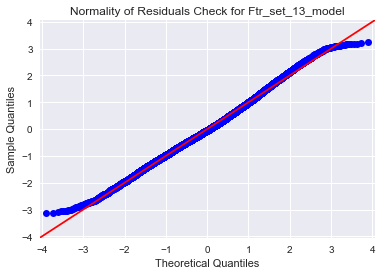

In [61]:
fig = sm.graphics.qqplot(ftr_set_13_model.resid, dist=stats.norm, line='45', fit=True)
plt.title('Normality of Residuals Check for Ftr_set_13_model');

The JB score has decreased considerably to under 106, which is about 70% of the previous score. The skew and kurtosis have also decreased to 0.17, and 3.079 respectively. Note that the QQ plot is now displaying a plot view that is twice as detailed on both axes as the original plot; so the departure from the straight line would be four times as pronounced. Also note that on then lower extreme of the data, we can see the decrease in data points. I will now check to see if the assumption of homoscedasticity is still satisfied. 

## Rechecking Homoscedasticity

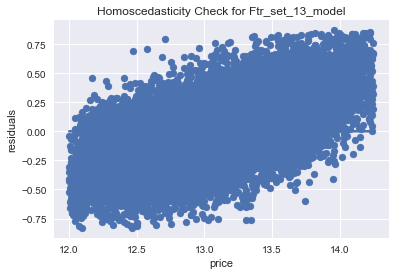

In [62]:
plt.scatter(y_ftr_12, ftr_set_13_model.resid)
plt.plot(y_ftr_12, [0 for i in range (len(ftr_set_13))]);
plt.xlabel("price")
plt.ylabel("residuals")
plt.title('Homoscedasticity Check for Ftr_set_13_model');

The variance looks pretty uniform throughout the whole data set. Now that all the assumptions seem to have been satisifed, I will make a formal confirmation of all four assumptions, in the following section.

# Formally Confirming the Four Assumptions.¶

## 1. Assumption of linear independence 

In [63]:
# Create correlation matrix where the values are true if the correlations are greater than .75: 
abs(ftr_set_13.corr()) > 0.75

,bdrm__3,bdrm__4,bdrm__5,bdrm__6,bdrm__7,bdrm__8,bthrm__2.75,bthrm__3.0,bthrm__3.25,bthrm__3.5,bthrm__3.75,bthrm__4.0,bthrm__4.25,bthrm__4.5,bthrm__5.0,flr__1.5,flr__2.5,flr__3.0,lat,log_sqft_living,log_sqft_lot,log_sqft_living15
bdrm__3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bdrm__4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bdrm__5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bdrm__6,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bdrm__7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bdrm__8,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bthrm__2.75,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bthrm__3.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bthrm__3.25,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bthrm__3.5,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


Upon visual inspection I see the values are all true diagonally across, as expected. I will confirm that I am not overlooking a correlation.

In [64]:
(abs(ftr_set_13.corr()) > 0.75).sum()

bdrm__3              1
bdrm__4              1
bdrm__5              1
bdrm__6              1
bdrm__7              1
bdrm__8              1
bthrm__2.75          1
bthrm__3.0           1
bthrm__3.25          1
bthrm__3.5           1
bthrm__3.75          1
bthrm__4.0           1
bthrm__4.25          1
bthrm__4.5           1
bthrm__5.0           1
flr__1.5             1
flr__2.5             1
flr__3.0             1
lat                  1
log_sqft_living      1
log_sqft_lot         1
log_sqft_living15    1
dtype: int64

With all the diagonal values equal to one (True), and the sum for each feaure equal to one, there are no feature correlations greater than .75 other than the features with themselves. This satisfies the assumption of linear independence.

## 2. Assumption of Variable linearity:

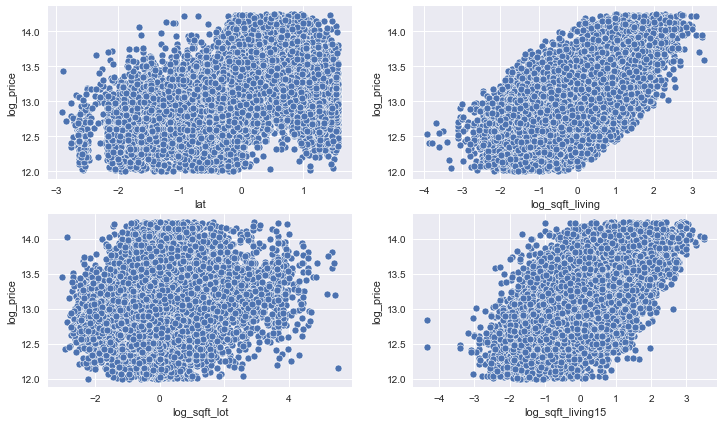

In [65]:
# creating extended feature set that includes target:
ftr_set_13_ext = pd.concat([ftr_set_13, y_ftr_12], axis=1)

#Reviewing the scatter plots after the outliers are dropped
ftr_set_13_to_plot = ftr_set_13_ext.iloc[:,18:22]

count=1
plt.subplots(figsize=(12, 7))
for i in ftr_set_8_to_plot.columns:
    plt.subplot(2,2,count)
    sns.scatterplot(ftr_set_13_to_plot[i],ftr_set_13_ext["log_price"])
    count+=1

plt.show()

From the scatter plots we can see the linear relationships between each continuous feature and the target. As for the all features in general, we can tell that they have a linear relationship with the target, through the coefficients they were assigned, and the fact that their p-values are well below .05. This should satisfy the assumption of variable linearity.

## 3. Assumption of Homoscedasticity

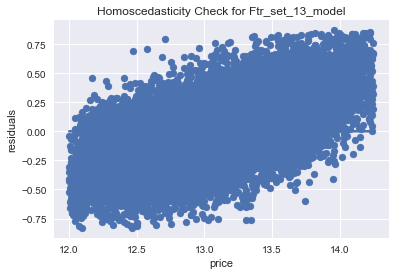

In [66]:
plt.scatter(y_ftr_12, ftr_set_13_model.resid)
plt.plot(y_ftr_12, [0 for i in range (len(ftr_set_13))]);
plt.xlabel("price")
plt.ylabel("residuals")
plt.title('Homoscedasticity Check for Ftr_set_13_model');

The variance in residual values looks pretty uniform throughout the data-set. This should satisfy the assumption of homoscedasticity of the residuals.

## 4. Assumption of Residual Normality

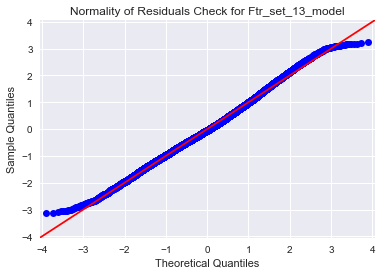

In [67]:
fig = sm.graphics.qqplot(ftr_set_13_model.resid, dist=stats.norm, line='45', fit=True)
plt.title('Normality of Residuals Check for Ftr_set_13_model');

The JB score has decreased considerably to under 106, which is about 70% of the previous score. The skew and kurtosis have also decreased to 0.17, and 3.079 respectively. Note that the QQ plot is now displaying a plot view that is twice as detailed on both axes as the original plot; so the departure from the straight line would be four times as pronounced. Also note that on then lower extreme of the data, we can see the decrease in data points. This should satisfy the assumption of residual normality.

# Renovation and Remodel Recommendations

## Creating a Data Set of the Final Model That is not Scaled

In [68]:
# Creating a list of features for the final model:
final_ftrs_cols = ftr_set_13.columns

# Creating unscaled dataframe with only the final features:
final_ftrs = X_log_cat_no_scale[final_ftrs_cols]

# Matching up the rows with the final scaled feature set(13):
final_ftrs = final_ftrs[final_ftrs.index.isin(ftr_set_13.index)]

# Adding target to the dataframe:
final_ftrs_ext = pd.concat([final_ftrs, ftr_set_13_ext['log_price'] ], axis=1)

# Adding constant:
final_ftrs_ext_df = sm.add_constant(final_ftrs_ext) 
final_ftrs_ext_df.info()

# Adding constant:
final_ftrs_const = sm.add_constant(final_ftrs)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20739 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              20739 non-null  float64
 1   bdrm__3            20739 non-null  uint8  
 2   bdrm__4            20739 non-null  uint8  
 3   bdrm__5            20739 non-null  uint8  
 4   bdrm__6            20739 non-null  uint8  
 5   bdrm__7            20739 non-null  uint8  
 6   bdrm__8            20739 non-null  uint8  
 7   bthrm__2.75        20739 non-null  uint8  
 8   bthrm__3.0         20739 non-null  uint8  
 9   bthrm__3.25        20739 non-null  uint8  
 10  bthrm__3.5         20739 non-null  uint8  
 11  bthrm__3.75        20739 non-null  uint8  
 12  bthrm__4.0         20739 non-null  uint8  
 13  bthrm__4.25        20739 non-null  uint8  
 14  bthrm__4.5         20739 non-null  uint8  
 15  bthrm__5.0         20739 non-null  uint8  
 16  flr__1.5           207

From the info() we can tell that the number of rows and the number of feature columns are the same.

In [69]:
final_ftrs_ext_df.describe()

,const,bdrm__3,bdrm__4,bdrm__5,bdrm__6,bdrm__7,bdrm__8,bthrm__2.75,bthrm__3.0,bthrm__3.25,bthrm__3.5,bthrm__3.75,bthrm__4.0,bthrm__4.25,bthrm__4.5,bthrm__5.0,flr__1.5,flr__2.5,flr__3.0,lat,log_sqft_living,log_sqft_lot,log_sqft_living15,log_price
count,20739.0,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000,20739.000000
mean,1.0,0.461835,0.318675,0.070495,0.012006,0.001543,0.000434,0.055451,0.034573,0.024543,0.031872,0.005690,0.004918,0.002363,0.003231,0.000530,0.089011,0.006413,0.028449,47.560281,7.541139,8.971584,7.532321,13.029263
std,0.0,0.498553,0.465974,0.255986,0.108916,0.039251,0.020828,0.228864,0.182699,0.154732,0.175664,0.075217,0.069959,0.048551,0.056748,0.023025,0.284767,0.079826,0.166255,0.139209,0.402366,0.897164,0.316058,0.457583
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.155900,5.913503,6.253829,6.131226,12.001199
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.469300,7.265430,8.517193,7.306531,12.691580
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.571200,7.549609,8.928773,7.512071,13.017003
75%,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.679600,7.828038,9.254788,7.753624,13.347106
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.777600,8.919988,13.968055,8.663888,14.247293


Upon reviewing the continuous features, we can tell they are no longer scaled. 

In [70]:
df.head(45)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,log_sqft_living,log_sqft_above,log_sqft_lot,log_sqft_living15,log_sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,missing,NONE,Average,7 Average,1180,1955,98178,47.5112,-122.257,1340,5650,12.309982,7.073270,7.073270,8.639411,7.200425,8.639411
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,1951,98125,47.7210,-122.319,1690,7639,13.195614,7.851661,7.682482,8.887653,7.432484,8.941022
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,1933,98028,47.7379,-122.233,2720,8062,12.100712,6.646391,6.646391,9.210340,7.908387,8.994917
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,1965,98136,47.5208,-122.393,1360,5000,13.311329,7.580700,6.956545,8.517193,7.215240,8.517193
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,1987,98074,47.6168,-122.045,1800,7503,13.142166,7.426549,7.426549,8.997147,7.495542,8.923058
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,2001,98053,47.6561,-122.005,4760,101930,14.022525,8.597851,8.266164,11.532042,8.468003,11.532042
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,7 Average,1715,1995,98003,47.3097,-122.327,2238,6819,12.458775,7.447168,7.447168,8.827468,7.713338,8.827468
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,NO,missing,Average,7 Average,1060,1963,98198,47.4095,-122.315,1650,9711,12.583995,6.966024,6.966024,9.181015,7.408531,9.181015
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,NO,NONE,Average,7 Average,1050,1960,98146,47.5123,-122.337,1780,8113,12.343658,7.484369,6.956545,8.918650,7.484369,9.001223
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,NO,NONE,Average,7 Average,1890,2003,98038,47.3684,-122.031,2390,7570,12.685408,7.544332,7.544332,8.788746,7.779049,8.931948


## Creating the Final Model based on the Unscaled Dataset

In [71]:
# Adding the constant column to the dataframe:
final_ftrs_df = sm.add_constant(final_ftrs)

# Fitting the data and creating the model:
final_ftrs_model = sm.OLS(ftr_set_13_ext['log_price'], final_ftrs_df).fit()

# Summary:
final_ftrs_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1835.
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:39:18   Log-Likelihood:                -2001.5
No. Observations:               20739   AIC:                             4049.
Df Residuals:                   20716   BIC:                             4232.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -61.8230      0.651    -94.903      0.000     -63.100     -60.546
bdrm__3              -0.1201      0.006    -19.187      0.000      -0.132      -0.108
bdrm__4              -0.1485      0.008    -19.773      0.000      -0.163      -0.134
bdrm__5              -0.1949      0.010    -19.126      0.000      -0.215      -0.175
bdrm__6              -0.2170      0.019    -11.507      0.000      -0.254      -0.180
bdrm__7              -0.3141      0.048     -6.529      0.000      -0.408      -0.220
bdrm__8              -0.3468      0.090     -3.858      0.000      -0.523      -0.171
bthrm__2.75           0.0509      0.008      6.033      0.000       0.034       0.067
bthrm__3.0            0.0710      0.011      6.761      0.000       0.050       0.092
bthrm__3.25           0.1522      0.012     12.287      0.000       0.128       0.176
bthrm__3.5            0.1643      0.011     14.750      0.000       0.142       0.186
bthrm__3.75           0.2171      0.025      8.666      0.000       0.168       0.266
bthrm__4.0            0.1892      0.027      7.007      0.000       0.136       0.242
bthrm__4.25           0.2557      0.039      6.637      0.000       0.180       0.331
bthrm__4.5            0.1556      0.033      4.663      0.000       0.090       0.221
bthrm__5.0            0.2167      0.081      2.669      0.008       0.058       0.376
flr__1.5              0.1319      0.007     19.916      0.000       0.119       0.145
flr__2.5              0.1977      0.023      8.469      0.000       0.152       0.243
flr__3.0              0.0738      0.012      6.220      0.000       0.051       0.097
lat                   1.4355      0.014    104.813      0.000       1.409       1.462
log_sqft_living       0.5399      0.008     64.073      0.000       0.523       0.556
log_sqft_lot         -0.0199      0.002     -8.442      0.000      -0.025      -0.015
log_sqft_living15     0.3681      0.009     41.216      0.000       0.351       0.386
==============================================================================
Omnibus:                      104.227   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.863
Skew:                           0.170   Prob(JB):                     1.03e-23
Kurtosis:                       3.079   Cond. No.                     1.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Parameters:

In [72]:
final_ftrs_model.params

const               -61.822979
bdrm__3              -0.120129
bdrm__4              -0.148535
bdrm__5              -0.194916
bdrm__6              -0.217017
bdrm__7              -0.314111
bdrm__8              -0.346786
bthrm__2.75           0.050917
bthrm__3.0            0.071003
bthrm__3.25           0.152209
bthrm__3.5            0.164250
bthrm__3.75           0.217080
bthrm__4.0            0.189182
bthrm__4.25           0.255687
bthrm__4.5            0.155578
bthrm__5.0            0.216699
flr__1.5              0.131854
flr__2.5              0.197682
flr__3.0              0.073836
lat                   1.435517
log_sqft_living       0.539926
log_sqft_lot         -0.019909
log_sqft_living15     0.368101
dtype: float64

# Renovation and Remodel Recommendations

## Baseline Features:

In [73]:
# Created a dataframe to a see how changes in a certain feature impact the price:

house_features1 = [{
#   Const:    
    'const'  :1,
                       
#    Bedrooms:                   
     'bdrm__3':0, 'bdrm__4':0, 'bdrm__5':0, 'bdrm__6':0, 'bdrm__7':0, 'bdrm__8':0,
                   
#    Bathrooms:                   
     'bthrm__2.75':0, 'bthrm__3.0':0, 'bthrm__3.25':0, 'bthrm__3.5':0, 'bthrm__3.75':0,'bthrm__4.0':0,
     'bthrm__4.25':0, 'bthrm__4.5':0, 'bthrm__5.0':0, 
                   
#   Floors:                   
     'flr__1.5':0, 'flr__2.5':0, 'flr__3.0':0,
    
#   Latitude:    
     'lat'    :47.56, 
                   
#   Log_sqft_living:    
    'log_sqft_living':7.54,
    
#   Log_sqft_lot:    
    'log_sqft_lot':9.009936,

#   Log_sqft_living15:    
    'log_sqft_living15':7.53}]

In [74]:
house_features1 = pd.DataFrame(house_features1)
print ('For the baseline model, the log_price is :',final_ftrs_model.predict(house_features1)[0])

For the baseline model, the log_price is : 13.113682471133828


         Baseline model:            
                'const': 1          
                  'lat': 47.56      
             'bedrooms': 1     (default)       
            'bathrooms': .5    (default)         
               'floors': 1     (default)       
      'log_sqft_living': 7.54       
         'log_sqft_lot': 9          
    'log_sqft_living15': 7.53       
            'log_price': 13.113682471133828   
          approximately: $495678.33 

note: The categorical features that are dropped are the ones with the lowest alpha-numeric value. These would be the options that are implicitly chosen if no other respective categorical feature is chosen. For example, if no bedrooms are chosen , the default would be 1.

## 1. Upgrade to Three Bathrooms:

In [75]:
# Created a dataframe to a see how changes in a certain feature impact the price:

house_features2 = [{
#   Const:    
    'const'  :1,
                       
#    Bedrooms:                   
     'bdrm__3':0, 'bdrm__4':0, 'bdrm__5':0, 'bdrm__6':0, 'bdrm__7':0, 'bdrm__8':0,
                   
#    Bathrooms:                   
     'bthrm__2.75':0, 'bthrm__3.0':1, 'bthrm__3.25':0, 'bthrm__3.5':0, 'bthrm__3.75':0,'bthrm__4.0':0,
     'bthrm__4.25':0, 'bthrm__4.5':0, 'bthrm__5.0':0, 
                   
#   Floors:                   
     'flr__1.5':0, 'flr__2.5':0, 'flr__3.0':0,
    
#   Latitude:    
     'lat'    :47.56, 
                   
#   Log_sqft_living:    
    'log_sqft_living':7.54,
    
#   Log_sqft_lot:    
    'log_sqft_lot':9.0,

#   Log_sqft_living15:    
    'log_sqft_living15':7.53}]

In [76]:
house_features2 = pd.DataFrame(house_features2)
print ('After upgrading to 3 bathrooms the log_price is :', final_ftrs_model.predict(house_features2)[0])

After upgrading to 3 bathrooms the log_price is : 13.184882922583839


In this case, we have a log-level regression, where the dependent variable 'price', is log transformed, and the independent variable 'bthrm__3.0' is not. It takes the following form:<br>
    

ln y = b0 + b1(x) + E<br><br>
where b0 is the constant, b1 is the slope coefficient, and E is the error term. <br><br>
    
    
We can calculate the change in price, based on the change in x with the following formula:<br>
    
                            %(change in y) = 100 * ((e^b1) - 1)
                            %(change in y) = 100 * ((e^0.071003) - 1)
                            %(change in y) = 100 * ((1.0735844) - 1)
                            %(change in y) = 7.35844%
                            
where: b1 = 0.071003

If we compare the e^log price value to the one where we multiply the baseline house price by multiplying by its change percentage wise, we get:

                            e ^ 13.184882922583839 = 495776.25 * 1.0735844
                                        $532257.63 = $532257.65

There is a difference of only two pennies, which may have been caused in part because I rounded the percentage value.
                            
Note: 
- When dealing with categorical values, this log-level formula works only when comparing the prices to the default       (dropped) values. 

- Given that these are one-hot encoded variables, x is not included in the equation since it is equal to one, and       would make no difference.

## 1. Upgrade to Two and a Half Floors:

In [77]:
# Created a dataframe to a see how changes in a certain feature impact the price:

house_features3 = [{
#   Const:    
    'const'  :1,
                       
#    Bedrooms:                   
     'bdrm__3':0, 'bdrm__4':0, 'bdrm__5':0, 'bdrm__6':0, 'bdrm__7':0, 'bdrm__8':0,
                   
#    Bathrooms:                   
     'bthrm__2.75':0, 'bthrm__3.0':1, 'bthrm__3.25':0, 'bthrm__3.5':0, 'bthrm__3.75':0,'bthrm__4.0':0,
     'bthrm__4.25':0, 'bthrm__4.5':0, 'bthrm__5.0':0, 
                   
#   Floors:                   
     'flr__1.5':0, 'flr__2.5':1, 'flr__3.0':0,
    
#   Latitude:    
     'lat'    :47.56, 
                   
#   Log_sqft_living:    
    'log_sqft_living':7.54,
    
#   Log_sqft_lot:    
    'log_sqft_lot':9.0,

#   Log_sqft_living15:    
    'log_sqft_living15':7.53}]

In [78]:
house_features3 = pd.DataFrame(house_features3)
print('After upgrading to 2.5 floors, the log_price is:', final_ftrs_model.predict(house_features3)[0])

After upgrading to 2.5 floors, the log_price is: 13.382565260322977


In this case, we have a log-level regression, where the dependent variable 'price', is log transformed, and the independent variable 'flr__2.5' is not. It takes the following form:<br>
    

ln y = b0 + b1(x) + E<br><br>
where b0 is the constant, b1 is the slope coefficient, and E is the error term. <br><br>
    
    
We can calculate the change in price, based on the change in x with the following formula:<br>
    
                            %(change in y) = 100 * ((e^b1) - 1)
                            %(change in y) = 100 * ((e^0.197682) - 1)
                            %(change in y) = 100 * ((1.2185748) - 1)
                            %(change in y) = 21.85748%
                            
where: with b1 = 0.197682

If we compare the e^log price value to the one where we multiply the baseline house price by multiplying by its change percentage wise, we get:

                            e ^ 13.382565260322977 = 532257.63 * 1.2185748
                                        $648595.97 = $648595.74

There is a difference of only twentythree cents, which may have been caused in part because I rounded the percentage value.
                            
Note: 
- When dealing with categorical values, this log-level formula works only when comparing the prices to the default       (dropped) values. 

- Given that these are one-hot encoded variables, x is not included in the equation since it is equal to one, and       would make no difference.

## Increasing Living Space to 2500 Square Feet:

In [79]:
# Created a dataframe to a see how changes in a certain feature impact the price:

house_features4 = [{
#   Const:    
    'const'  :1,
                       
#    Bedrooms:                   
     'bdrm__3':0, 'bdrm__4':0, 'bdrm__5':0, 'bdrm__6':0, 'bdrm__7':0, 'bdrm__8':0,
                   
#    Bathrooms:                   
     'bthrm__2.75':0, 'bthrm__3.0':1, 'bthrm__3.25':0, 'bthrm__3.5':0, 'bthrm__3.75':0,'bthrm__4.0':0,
     'bthrm__4.25':0, 'bthrm__4.5':0, 'bthrm__5.0':0, 
                   
#   Floors:                   
     'flr__1.5':0, 'flr__2.5':1, 'flr__3.0':0,
    
#   Latitude:    
     'lat'    :47.56, 
                   
#   Log_sqft_living:    
    'log_sqft_living':7.824,
    
#   Log_sqft_lot:    
    'log_sqft_lot':9.0,

#   Log_sqft_living15:    
    'log_sqft_living15':7.53}]

In [80]:
house_features4 = pd.DataFrame(house_features4)
print('After upgrading to 2.5 floors, the log_price is:', final_ftrs_model.predict(house_features4)[0])

After upgrading to 2.5 floors, the log_price is: 13.5359042176324


In this case, we have a log-log regression, where the dependent variable 'price', is log transformed, and the independent variable 'log_sqft_living' is log transformed as well. It takes the following form:<br>
    

ln y = b0 + b1(x) + E<br><br>
where b0 is the constant, b1 is the slope coefficient, and E is the error term. <br><br>
    
    
We can calculate the change in price, based on the change in x with the following formula:<br>
    
                            %(change in y) = b1 * %(change in x)
                            %(change in y) = (100 * ((new_x - x) / x) * b1)%
                            %(change in y) = (100 * ((2499.88497551 - 1881.83002516) / 1881.83002516) * b1)%
                            %(change in y) = (100 * ((618.05495035) / 1881.83002516) * b1)%
                            %(change in y) = (100 * 0.32843293075 * 0.539926)%
                            %(change in y) = 17.7329478568%
                          
                            
where: b1 = 0.539926<br>
        x = current log_sqft_living = (e ^ 7.54)  = 1881.83002516<br>
    new_x =     new log_sqft_living = (e ^ 7.824) = 2499.88497551<br><br>
    

       
If we compare the e^log price value to the one where we multiply the baseline house price by multiplying by its change percentage wise, we get:

                            e ^ 13.5359042176324 = 648595.97 * 1.177329478568
                                        $756081.32 = $763611.16



This gives us a difference of less than 1%, which may have been caused in part due to rounding of certain numbers.                    

# Project Conclusion: Main Take-aways

1. It is critical to have some understanding of the subject matter one is dealing with, in order to be able to select features, more effectively, and root out non-sensical results.<br>
2. If the ordinal data in one's data set does not have a monotonic relationship, one may wind up with non-sensical results. For example, recommending a downgrade from 'grd_10 Very Good' to 'grd_9 Better', in order to increase the price of the home.<br>
3. High multi-colinearity between features, may lead to unexpected results. For example, one may have two features that are highly correlated, where both have positive Pearson correlations, but one has a negative regression coefficient.<br>
4. The features with the higher Perason correlation coefficient, do not necessarily have a higher regression coefficient. I found this particularly in the 'dummy' variables. I think this may have something to do with these variables not having an equal number of occurences, since only one can be chosen at a time, for each row of data.
5. I understand that the distribution of the residuals do not necessarily have to be perfectly normal, but I am not clear as to what is defined as 'normal enough'.
6. I may have been able to further improve the R-squared score by adding 'sqft_bsmnt' as a binary variable.
7. I originally planned to associate the zip codes with their corresponding average household incomes (per the U.S    census bureau),then binning by income groups, and creating interactions, but ultimately decicded against it because it generated too many columns, and didn't lend itself to learning.
8. Log transforming the dependent variable can help approximate a normal residual distribution.
9. Removing rows with outliers in the dependent variable can help approximate a normal residual distribution.
